<p align="center">
  <img src="https://raw.githubusercontent.com/CatarinaGN/Case-1/main/Customer%20Segmentation%20Analysis%20in%20Lisbon%20Hotels.png" width="100%">
</p>

<h3 align="center">📍 University: Nova IMS</h3>

--- 

<h3 style="text-align: center;"><u></b>Group P</u></b></h3>

|     Student Name     |     Student ID     | 
|         ---          |           ---          |
|     Beatriz Monteiro|   20240591        | 
|     Catarina Nunes           |       20230083       |
|     Margarida Raposo      |       20241020       |
|     Teresa Menezes   |      20240333       |

### 🔗 Table of Contents <a id='table-of-contents'></a>
1. [Introduction](#introduction)  
2. [Business Understanding](#business-understanding)  
3. [Data Understanding](#data-understanding)  
4. [Data Preparation](#data-preparation)  
5. [Modeling](#modeling)  
6. [Evaluation](#evaluation)  
7. [Conclusion](#conclusion)  

---

### 📌 Introduction <a id='introduction'></a>

This project follows the **CRISP-DM** methodology to conduct a customer segmentation analysis for hotels in Lisbon. 


#### Hotel Customer Segmentation

This case study focuses on customer segmentation for Hotel H, a member of an independent hotel chain located in Lisbon, Portugal. The hotel's current market segmentation strategy, based solely on the origin of customers, is deemed inadequate by the new marketing manager, A. The primary objective is to develop a more comprehensive segmentation approach that incorporates geographic, demographic, and behavioral characteristics to better understand and target different customer groups. The findings aim to inform strategic decisions on product offerings, pricing, and marketing efforts to enhance customer engagement and acquisition.

**Features**

- ID: Customer ID
- Nationality: Nationality of the customer in ISO 3166-1 (Alpha 3) format
- Age: The age of the customer
- DaysSinceCreation: Number of elapsed days since the customer was created
- NameHash: Hash of the customer's name
- DocIDHash: Hash of the customer’s personal document identification number (usually a passport or ID card)
- AverageLeadTime: Average number of days before arrival date the customer makes bookings
- LodgingRevenue: Total amount of lodging revenue paid by the customer so far
- OtherRevenue: Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far
- BookingsCanceled: Number of bookings the customer made but subsequently canceled
- BookingsNoShowed: Number of bookings the customer made but subsequently made a "no-show"
- BookingsCheckedin: Number of bookings the customer made, which actually ended up staying
- PersonNights: Total person/nights the customer has stayed at the hotel so far. Persons/Nights are the sum of Adults and Children
- in each booking, multiplied by the number of Nights (Length-of-stay) of the booking
- RoomNights: Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights (Length-ofstay) of the booking
- DistributionChannel: Distribution channel normally used by the customer to make bookings at the hotel
- MarketSegment: Current market segment of the customer
- SRHighFloor: Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes)
- SRLowFloor: Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes)
- SRAccessibleRoom: Indication if the customer usually asks for an accessible room (0: No, 1: Yes)
- SRMediumFloor: Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes)
- SRBathtub Indication: if the customer usually asks for a room with a bathtub (0: No, 1: Yes)
- SRShower: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)
- SRCrib: Indication if the customer usually asks for a crib (0: No, 1: Yes)
- SRKingSizeBed: Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes)
- SRTwinBed Indication: if the customer usually asks for a room with a twin bed (0: No, 1: Yes)
- SRNearElevator: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)
- SRAwayFromElevator: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)
- SRNoAlcoholInMiniBar: Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes)
- SRQuietRoom: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)

CRISP-DM
- Business Understanding: Defining objectives, assessing resources, and project planning.
- Data Understanding: Collecting, exploring, and verifying data quality.
- Data Preparation: Selecting, cleaning, constructing, integrating, and formatting data to ensure it is ready for analysis.
- Modeling:
- Evaluation:
- Deployment:

---

In [223]:
#data understanding
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator, MaxNLocator
import plotly.express as px
import missingno as msno
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objects as go

#duplicates
from collections import defaultdict
#missing values
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
#outliers
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from scipy.stats import zscore, boxcox
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats.mstats import winsorize

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names", category=UserWarning)
warnings.filterwarnings("ignore", message="The default value of `normalized_stress` will change", category=FutureWarning)

In [151]:
#compose a pallete to use in the vizualizations
pal_novaims = ['#A0C020','#003B5C', '#FF8C00', '#D3D3D3','#6A5ACD']
pastel_color = sns.utils.set_hls_values(pal_novaims[1], l=0.4, s=0.3)

### 📌 Business Understanding <a id='business-understanding'></a>

##### Click [here](#table-of-contents) ⬆️ to return to the Index.
---

### <span style="background-color:#accbf1; padding:5px; border-radius:5px;"> 📌 Data Understanding</span> <a id='data-understanding'></a>

- **[Data Loading and Description](#data-loading-and-description)**  
- **[Data Types](#Data-TypesDU)**
- **[Univariate EDA: Descriptive Summary](#Descriptive-Summary)**
- **[Univariate EDA: Missing values](#missing-valuesDU)**  
- **[Inconsistencies](#inconsistenciesDU)**  
- **[Feature Engineering](#feature-engineeringDU)**  
- **[Univariate EDA: Data Visualization](#univariate-vizualization)**  
    - **Numerical Variables:**  
        - [Numeric variables: Histograms](#hist)
        - [Outliers Analysis: Box-Plots](#box)
    - **Categorical Variables**  
        - [Categorical variables: Bar Plots](#bar)
        - [Categorical variables: Geographic Map](#GeographicMap)
- **[Bivariate EDA: Data Visualization](#Bivariate-Vizualization)**  
   - [Numeric-Numeric: Correlations](#NNCorrelations)
   - [Numeric-Categorical: Correlations](#NCCorrelations)
   - [Categorical-Categorical: Cross-tabulations](#CCCross-tabulations)
- **[Multivariate EDA: Duplicates](#Multivariate)**
   - [Old Segmentation Vs. All](#old-segmentation)
   - [Duplicates](#duplicatesdu)  
- **[Market Basket Analysis](#MBA)**  


##### Click [here](#table-of-contents) ⬆️ to return to the Index.
---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Data Loading and Description**</span> <a id='data-loading-and-description'></a>  
_This section provides an overview of the dataset, including its structure, size, and general characteristics._  

##### Click [here](#table-of-contents) ⬆️ to return to the Index.ick [here](#table-of-contents) ⬆️ to return to the Index.


In [10]:
df = pd.read_csv('Case1_HotelCustomerSegmentation.csv', sep = ';')
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,0,2,6,4,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,0,1,10,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


Now, we want to set the column ID as the index in the dataframe, as this column is supposed to identify an individual reservation. However, first, to ensure we don't lose any important rows due to identifier mistakes, we will check if this column only contains unique values:

In [12]:
unique_reservations = df['ID'].nunique()
total_rows = len(df)

print(f"The ID column has {unique_reservations}"
      f" unique values,\nand the dataframe df has {total_rows} rows.")
if unique_reservations == total_rows:
    print("All ID values are unique.")
else:
    print("There are duplicate ID values.")

The ID column has 111733 unique values,
and the dataframe df has 111733 rows.
All ID values are unique.


In [13]:
df.set_index('ID', inplace = True)

In [14]:
df_eda = df.copy()

---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Data Types**</span> <a id='Data-TypesDU'></a>  
_By reducing memory consumption, we can enhance the performance of subsequent sections, including **feature engineering, clustering algorithms, and distance-based models**._   

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [16]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111733 entries, 1 to 111733
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Nationality           111733 non-null  object 
 1   Age                   107561 non-null  float64
 2   DaysSinceCreation     111733 non-null  int64  
 3   NameHash              111733 non-null  object 
 4   DocIDHash             110732 non-null  object 
 5   AverageLeadTime       111733 non-null  int64  
 6   LodgingRevenue        111733 non-null  float64
 7   OtherRevenue          111733 non-null  float64
 8   BookingsCanceled      111733 non-null  int64  
 9   BookingsNoShowed      111733 non-null  int64  
 10  BookingsCheckedIn     111733 non-null  int64  
 11  PersonsNights         111733 non-null  int64  
 12  RoomNights            111733 non-null  int64  
 13  DistributionChannel   111733 non-null  object 
 14  MarketSegment         111733 non-null  object 
 15  SRHig

`Note`: Its important to optimize the columns datatyes, specially to improve the model performance. Right now we have a memory usage of 24.7+ MB, but we can clearly see that some columns can be optimized.

Lets see the values of each column to see the optimal type for the Categorical Variables Columns and Numerical Variables:

---
#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Univariate EDA: Descriptive Summary**</span> <a id='Descriptive-Summary'></a>  
_A detailed summary of the variables, including their central tendency, dispersion, and distribution._  

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [19]:
# Summary statistics for numeric columns
df_eda.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,107561.0,45.639191,17.244952,-10.0,33.0,47.0,58.0,123.00
DaysSinceCreation,111733.0,595.026599,374.657382,36.0,288.0,522.0,889.0,1385.00
AverageLeadTime,111733.0,60.833147,85.115320,-1.0,0.0,21.0,95.0,588.00
LodgingRevenue,111733.0,283.851283,379.131556,0.0,0.0,208.0,393.3,21781.00
OtherRevenue,111733.0,64.682802,123.580715,0.0,0.0,31.0,84.0,8859.25
BookingsCanceled,111733.0,0.002282,0.080631,0.0,0.0,0.0,0.0,15.00
BookingsNoShowed,111733.0,0.000600,0.028217,0.0,0.0,0.0,0.0,3.00
BookingsCheckedIn,111733.0,0.737607,0.730889,0.0,0.0,1.0,1.0,76.00
PersonsNights,111733.0,4.328318,4.630739,0.0,0.0,4.0,6.0,116.00
RoomNights,111733.0,2.203825,2.301637,0.0,0.0,2.0,3.0,185.00


**Numeric variables**: `Age`; `DaysSinceCreation`; `AverageLeadTime`; `LodgingRevenue`; `OtherRevenue`; `BookingsCanceled`; `BookingsNoShowed`; `BookingsCheckedIn`; `PersonsNights`; `RoomNights`.

- The only numeric columns that should be in float format are `LodgingRevenue` and `OtherRevenue`. Large range (0 to 21,781) and (0 to 8859.25), so **float32** is optimal for memory without losing precision. This two columns contain **outliers**, with their maximum values being significantly higher than the mean and even the 75th percentile. This indicates that a small number of clients, possibly corporate clients or large groups, spent much more at the hotel compared to the majority. Such outliers can distort summary statistics, including averages and quartiles, potentially leading to a misleading representation of the typical revenue patterns.

- The variable `age` contains incorrect negative values and a maximum of 123 which is not possible. The type should be **uint8** because no one is older than 255 years and there are no negative ages.

- `DaysSinceCreation` ranges from 36 to 1385, fits within uint16 (0 to 65,535).

- `AverageLeadTime` has a negative value of -1 that needs to be adressed because doesn't make sense to have negative values in a variable that represents the *average number of days before arrival date 
the customer makes bookings*. So the type should be **int16** if we want to consider the negative value or **uint16** (0 to 65,535) if not.

- For variables `BookingsCanceled`, `BookingsNoShowed`, `BookingsCheckedIn`, `PersonsNights` and `RoomNights` the type **uint8** (0 to 255) is the best choice. `BookingsCheckedIn`, `PersonsNights` and `RoomNights` have a significant difference between the 3rd quartile and the maximum value, which means they have highly skewed distributions.

**Boolean (0: No, 1: Yes)**: `SRHighFloor`; `SRLowFloor`; `SRAccessibleRoom`; `SRMediumFloor`; `SRBathtub`; `SRShower`; `SRCrib`; `SRKingSizeBed`; `SRTwinBed`; `SRNearElevator`; `SRAwayFromElevator`; `SRNoAlcoholInMiniBar`; `SRQuietRoom`.
- Boolean variables should be of type **`bool`** or **`int8`** to optimize memory usage.

Efficient data types:
| column                                   | corrected type      |
|------------------------------------------|----------------------|
| `Age`                                    | `uint8`              | 
| `DaysSinceCreation`                      | `uint16`            | 
| `AverageLeadTime`                        | `uint16`           |
| `LodgingRevenue`                         | `float32`              | 
| `OtherRevenue`                           | `float32`              | 
| `BookingsCanceled`                       | `uint8`              | 
| `BookingsNoShowed`                       | `uint8`              | 
| `BookingsCheckedIn`                      | `uint8`              | 
| `PersonsNights`                         | `uint8`              | 
| `RoomNights`                         | `uint8`              | 
| `SRHighFloor`; `SRLowFloor`; `SRAccessibleRoom`; `SRMediumFloor`; `SRBathtub`; `SRShower`; `SRCrib`; `SRKingSizeBed`; `SRTwinBed`; `SRNearElevator`; `SRAwayFromElevator`; `SRNoAlcoholInMiniBar`; `SRQuietRoom`                   | `uint8` or `bool`             | 

#### Non Numeric Features

In [33]:
# Summary statistics for non numeric columns
df_eda.describe(include = ['O']).T

,count,unique,top,freq
Nationality,111733,199,FRA,16516
NameHash,111733,107584,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,75
DocIDHash,110732,103480,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,3032
DistributionChannel,111733,4,Travel Agent/Operator,91019
MarketSegment,111733,7,Other,63680


**Categorical Variables**: `Nationality`; `NameHash`; `DocIDHash`; `DistributionChannel`; `MarketSegment` are correctly defined as object.

`Nationality:`
   - Contains **199 unique values**, meaning there is a good amount of diversity in customer origins.  
   - The most common nationality is **"FRA" (France)**, appearing **16,516 times**.  
   - This suggests a strong concentration of customers from France -> so its good to maintain these separated in the grouping phase (analyse this better)

`NameHash & DocIDHash:`
   - These are **hashed identifiers** for anonymized customer and document data.  
   - The `DocIDHash` column has a ID with +3K entries, we need to look further into this because it can be an error or an id that is used when we dont have the customer id -> therefore, not a good unique identifier.

`DistributionChannel:`
   - Has only **4 unique categories**, making it a **low-cardinality categorical variable**.

`MarketSegment:` 
   - Contains **7 unique categories**, which is still relatively low in cardinality.  
   - The most common segment is **"Other"** (lack of specificity).

**Recommendation for Data Processing:**
- `Nationality`: Consider grouping less frequent nationalities into an "Other" category if needed for modeling.

---
#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Univariate EDA: Missing Values**</span> <a id='missing-valuesDU'></a>  
_Identifying missing values and assessing their impact on data quality and analysis._

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [38]:
# Checking missing values - Code adapted from prev notebook
missing_values = df_eda.isnull().sum().to_frame(name='Total')
missing_values['Percentage'] = (missing_values['Total'] / len(df_eda) * 100).round(2).astype(str) + '%'
missing_values.sort_values(by='Total', ascending=False, inplace=True)
missing_values

,Total,Percentage
Age,4172,3.73%
DocIDHash,1001,0.9%
Nationality,0,0.0%
SRHighFloor,0,0.0%
SRNoAlcoholInMiniBar,0,0.0%
SRAwayFromElevator,0,0.0%
SRNearElevator,0,0.0%
SRTwinBed,0,0.0%
SRKingSizeBed,0,0.0%
SRCrib,0,0.0%


Only columns `Age` and `DocIDHash` have missing values, 3.73% and 0.9% respectively. Different methods can be used to correct these columns during preparation. 

In [46]:
df_eda['DocIDHash'].value_counts().idxmax()

'0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855'

This is the ID we found earlier, this id can be linked to people without the real id, so we eill check and adress this during preparation.

In [51]:
# Identify missing values
missing_age = df_eda['Age'].isnull()
missing_docid = df_eda['DocIDHash'].isnull()
most_repeated_docid = '0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855'
docid_repeated = df_eda['DocIDHash'] == most_repeated_docid
never_checked_in = df_eda['BookingsCheckedIn'] == 0

# Compute total missing counts
total_missing_age = missing_age.sum()
total_missing_docid = missing_docid.sum()
total_most_repeated_docid = docid_repeated.sum()

# Compute missing values where customers never checked in
missing_age_nocheckin = df_eda.loc[missing_age & never_checked_in].shape[0]
missing_docid_nocheckin = df_eda.loc[missing_docid & never_checked_in].shape[0]
specific_docid_missing_nocheckin = df_eda.loc[docid_repeated & never_checked_in].shape[0]

# Compute percentages safely (avoid division by zero)
percentage = lambda x, y: f"{(x / y * 100):.2f}%" if y else "0.00%"

percentage_age_nocheckin = percentage(missing_age_nocheckin, total_missing_age)
percentage_docid_nocheckin = percentage(missing_docid_nocheckin, total_missing_docid)
percentage_specific_docid_nocheckin = percentage(specific_docid_missing_nocheckin, total_most_repeated_docid)

# Create a DataFrame for results
data = {
    'Variable': ['Age Missing values', 'DocIDHash Missing values', 'Most Repeated DocIDHash'],
    'Total': [total_missing_age, total_missing_docid, total_most_repeated_docid],
    'Never Check-in': [missing_age_nocheckin, missing_docid_nocheckin, specific_docid_missing_nocheckin],
    'Never Check-in (%)': [percentage_age_nocheckin, percentage_docid_nocheckin, percentage_specific_docid_nocheckin]
}

missing_values_table = pd.DataFrame(data)
missing_values_table

,Variable,Total,Never Check-in,Never Check-in (%)
0,Age Missing values,4172,1125,26.97%
1,DocIDHash Missing values,1001,997,99.60%
2,Most Repeated DocIDHash,3032,128,4.22%


Therefore, we can conclude that nearly 100% of the missing values in `DocIDHash` correspond to clients who haven't checked in yet. These may be customers who are registered on the hotel website but have not made a reservation, and so they are not required to provide an ID.

he people with the most repeated id actually check in, so it can be like a standard word for when the customer does not have the id in the reservation, maybe like "." or "na" so its important to approach this during preparation.

---
#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Inconsistencies**</span> <a id='inconsistenciesDU'></a>  
_Checking for inconsistencies in data, such as incorrect formats, out-of-range values, or logical errors._ 

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [64]:
df_eda.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'NameHash', 'DocIDHash',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'MarketSegment', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [72]:
# Check for negative values in numeric columns where negatives don't make sense
negative_values = df_eda[
    (df_eda['Age'] < 0) |
    (df_eda['DaysSinceCreation'] < 0) |
    (df_eda['AverageLeadTime'] < 0) |
    (df_eda['LodgingRevenue'] < 0) |
    (df_eda['OtherRevenue'] < 0) |
    (df_eda['BookingsCanceled'] < 0) |
    (df_eda['BookingsNoShowed'] < 0) |
    (df_eda['BookingsCheckedIn'] < 0) |
    (df_eda['PersonsNights'] < 0) |
    (df_eda['RoomNights'] < 0)
]
print(f"Negative Values Found: {negative_values.shape[0]} records")

Negative Values Found: 27 records


In [81]:
# Customers with revenue but no check-ins
revenue_no_checkin = df_eda[
    (df_eda['BookingsCheckedIn'] == 0) &
    ((df_eda['LodgingRevenue'] > 0) | (df_eda['OtherRevenue'] > 0))
]
print(f"Customers with revenue but no check-ins: {revenue_no_checkin.shape[0]} records")

Customers with revenue but no check-ins: 1 records


> It's strange and can be a system error.

In [103]:
# Customers with bookings but no check-ins, cancellations, or no-shows
bookings_no_activity = df_eda[
    ((df_eda['BookingsCanceled'] != 0) |
    (df_eda['BookingsNoShowed'] != 0) |
    (df_eda['BookingsCheckedIn'] != 0)) &
    ((df_eda['PersonsNights'] == 0) | (df_eda['RoomNights'] == 0))
]
print(f"Customers with bookings but no actual activity: {bookings_no_activity.shape[0]} records")

Customers with bookings but no actual activity: 5 records


In [105]:
bookings_no_activity

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
43674,NLD,33.0,641,0x65E5986F79B75C8A171FEEA2E534AAD806D5ACB083D6...,0x67D8A25C96313AEF8A5842A87F2F6AB29DE01DAC80BE...,41,267.0,109.0,0,0,1,0,4,Travel Agent/Operator,Groups,0,0,0,0,0,0,0,0,1,0,0,0,0
47035,USA,38.0,599,0xF7AF83C7E570B4E929A21225DA15EDAD1EAF33C9226E...,0x2C7A2BA2FE12FC4BBA48C1D55789E2BEFC23027F05BD...,0,0.0,0.0,2,0,0,0,0,Direct,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0
80037,BRA,35.0,336,0x0596170AE19299CB3CEBA98BC2FAF9BF5333031C6A32...,0x8186236B5A280E296DC622D0B419BBEBB5BC8E1D4338...,63,242.0,24.0,0,0,1,0,2,Travel Agent/Operator,Other,0,0,0,0,0,0,1,1,0,0,0,0,0
85781,USA,67.0,259,0xD0C14D44BB72D7FA9673B2EE2EE9C8021EBDF81A7EF0...,0x420A533D66150B9173FAB8F5AF0DB8C54EBDFA001663...,1,314.4,141.1,0,0,1,0,3,Direct,Direct,0,0,0,0,0,0,0,1,0,0,0,0,0
90375,DEU,52.0,214,0xFC913F891030DD576FDA085E7859D44AB7EE8B000D59...,0x050B3FEBB73D2924810D9C068846F14550B03BCFDC7C...,36,2514.0,103.5,0,0,1,0,2,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0


> The one with 0 in PersonsNights and RoomNights has to canceled Bookings, but the others have check ins so they dont make sence.

In [92]:
# Customers with 0 check-ins but special requests
special_request_columns = [
    'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
    'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
    'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom'
]

special_requests_no_checkin = df_eda[
    (df_eda['BookingsCheckedIn'] == 0) & (df_eda['BookingsCanceled'] == 0) & (df_eda['BookingsNoShowed'] == 0) &
    (df_eda[special_request_columns].sum(axis=1) > 0)
]
print(f"Customers with special requests but no check-ins: {special_requests_no_checkin.shape[0]} records")

Customers with special requests but no check-ins: 20422 records


> So customers with no check ins can still have their preferences, so we can actually use these potential clients as a separated segment and analyze how we can incentivize them.

Go to [Inconsistencies Treatment](#inconsistencies) (Data Preparation Section)

---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Feature Engineering**</span> <a id='feature-engineeringDU'></a>  
_Creating new meaningful features to improve the predictive power of models._

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

**1️⃣ Booking Behavior Segmentation**  
**Features:**  
- `BookingFrequency`: Total number of bookings (checked-in, canceled, or no-show).  
- `BookingSuccessRate`: Ratio of successful check-ins to total bookings.  

In [118]:
df_eda['BookingFrequency'] = df_eda['BookingsCheckedIn'] + df_eda['BookingsCanceled'] + df_eda['BookingsNoShowed']

df_eda['BookingSuccessRate'] = (df_eda['BookingsCheckedIn'] / df_eda['BookingFrequency'])

---

**2️⃣ Revenue-Based Segmentation**  
**Features:**  
- `Total_Revenue`: Sum of lodging and other revenue.  
- `SpendingPerBooking`: Revenue per booking.  
- `RevenuePerPersonNight`: Revenue per person-night.  
- `ADR (Average Daily Rate)`: Revenue per room-night.  

In [123]:
df_eda['Total_Revenue'] = df_eda['LodgingRevenue'] + df_eda['OtherRevenue']

df_eda['SpendingPerBooking'] = df_eda['Total_Revenue'] / df_eda['BookingFrequency']

df_eda['RevenuePerPersonNight'] = np.where(df_eda['PersonsNights'] == 0, 0, df_eda['Total_Revenue'] / df_eda['PersonsNights'])

df_eda['ADR'] = np.where(df_eda['RoomNights'] == 0, 0, df_eda['Total_Revenue'] / df_eda['RoomNights'])

---

**3️⃣ Room & Occupancy Segmentation**  
**Features:**  
- `AvgOccupancy`: Average number of persons per room-night. 

In [126]:
df_eda['AvgOccupancy'] = np.where(df_eda['RoomNights'] == 0, 0, df_eda['PersonsNights'] / df_eda['RoomNights'])

---

**4️⃣ Special Request Preferences Segmentation**  
**Features:**  
- `TotalSpecialRequests`: Total number of special requests per customer.  
- `SRFloor`: Floor preferences.  
- `SRBed`: Bed preferences.  
- `SRNoisePreference`: Noise-related preferences.  
- `SRBathroom`: Bathroom-related preferences.  

In [121]:
total_special_requests = df_eda['SRHighFloor'] + df_eda['SRLowFloor'] + df_eda['SRAccessibleRoom'] + \
                         df_eda['SRMediumFloor'] + df_eda['SRBathtub'] + df_eda['SRShower'] + \
                         df_eda['SRCrib'] + df_eda['SRKingSizeBed'] + df_eda['SRTwinBed'] + \
                         df_eda['SRNearElevator'] + df_eda['SRAwayFromElevator'] + \
                         df_eda['SRNoAlcoholInMiniBar'] + df_eda['SRQuietRoom']
df_eda['TotalSpecialRequests'] = total_special_requests

df_eda['SRFloor'] = df_eda['SRHighFloor'] + df_eda['SRMediumFloor'] + df_eda['SRLowFloor']
df_eda['SRBed'] = df_eda['SRKingSizeBed'] + df_eda['SRTwinBed'] + df_eda['SRCrib']
df_eda['SRNoisePreference'] = df_eda['SRNearElevator'] + df_eda['SRAwayFromElevator'] + df_eda['SRQuietRoom']
df_eda['SRBathroom'] = df_eda['SRBathtub'] + df_eda['SRShower']

---
#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Univariate EDA: Data Visualization**</span> <a id='univariate-vizualization'></a>  
_Visualizing individual variables to understand their distributions and key patterns._

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [218]:
categorical_original = ['DistributionChannel', 'MarketSegment',
                        'SRHighFloor', 'SRLowFloor','SRAccessibleRoom', 'SRMediumFloor', 
                        'SRBathtub','SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
                        'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom']

geo_data = ['Nationality']

# The special request features are binary in nature, representing whether a customer has made a 
#specific request (1) or not (0). These variables indicate membership in distinct categories, 
#rather than numerical quantities. For example, a value of 1 means the customer requested a high floor, 
#while 0 means they did not. This binary structure aligns with categorical data, where the focus is on 
#grouping entities based on characteristics rather than measuring a continuous or discrete quantity.

numeric_discrete_original = [
    'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights',
    'RoomNights']
numeric_continuous_original = ['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue']


numeric_discrete_new = ['BookingFrequency', 'TotalSpecialRequests', 'SRFloor', 'SRBed', 'SRNoisePreference', 
                        'SRBathroom'] # in here we have the Sum so its different

numeric_continuous_new = [
    'BookingSuccessRate', 'Total_Revenue', 'SpendingPerBooking', 'RevenuePerPersonNight', 
    'AvgOccupancy', 'ADR']

categorical_col = categorical_original
numeric_discrete_col = numeric_discrete_original + numeric_discrete_new
numeric_continuous_col = numeric_continuous_original + numeric_continuous_new

In [133]:
#this function will be reuse to format the axis

def format_func(value, tick_number):
    if value == 0:
        return '0'
    elif value < 1:
        return f'{value:.2f}'
    else:
        return f'{value:.0f}' 

In [135]:
def plot_histograms(data, columns, num_rows, num_cols):
    total_plots = len(columns)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 3 * num_rows))
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs]  

    for i, col in enumerate(columns):
        if i < len(axs):  
            
            sns.histplot(data[col], bins=50, kde=True, ax=axs[i], color=pastel_color)  
            axs[i].set_title(f'Distribution of {col}')
            axs[i].set_xlabel(col)
            axs[i].set_ylabel('Count')
            axs[i].grid(color='lightgray', alpha=0.2)
            axs[i].xaxis.set_major_formatter(FuncFormatter(format_func))
            
            max_value = data[col].dropna().max()
            if np.isfinite(max_value):
                if max_value <= 1:
                    axs[i].xaxis.set_major_locator(MultipleLocator(0.1))  
                elif max_value <= 30:
                    axs[i].xaxis.set_major_locator(MultipleLocator(1))
                elif max_value <= 70:
                    axs[i].xaxis.set_major_locator(MultipleLocator(2)) 
                elif max_value <= 120:
                    axs[i].xaxis.set_major_locator(MultipleLocator(5))  
                else:
                    axs[i].xaxis.set_major_locator(MaxNLocator(integer=True)) 

                axs[i].set_xlim(0, max_value) 
            else:
                axs[i].set_xlim(0, 1)  

            plt.setp(axs[i].get_xticklabels(), rotation=0)

    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

In [137]:
def plot_boxplots(data, columns, num_rows, num_cols):
    total_plots = len(columns)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 2 * num_rows))
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs]  

    stats = [] 

    for i, col in enumerate(columns):
        if i < len(axs):  
            # Create the boxplot
            boxplot = sns.boxplot(x=data[col], ax=axs[i], color=pal_novaims[1])  

            # Apply alpha to the boxplot elements
            for patch in boxplot.patches:
                patch.set_alpha(0.5)

            axs[i].set_title(f'Distribution of {col}')
            axs[i].set_xlabel(col)  
            axs[i].set_ylabel('')  
            axs[i].grid(color='lightgray', alpha=0.2)

            axs[i].xaxis.set_major_formatter(FuncFormatter(format_func))
            max_value = data[col].dropna().max() 
            if np.isfinite(max_value):
                axs[i].set_xlim(0, max_value)  
            else:
                axs[i].set_xlim(0, 1)  

            # IQR statistics
            q1 = data[col].quantile(0.25)
            median = data[col].median()
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lower_fence = q1 - 1.5 * iqr
            upper_fence = q3 + 1.5 * iqr
            min_val = data[col].min()
            max_val = data[col].max()
            stats.append([col, min_val, lower_fence, q1, median, q3, upper_fence, max_val])
            
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(stats, columns=['Variable', 'Min', 'Lower Fence', 'Q1', 'Median', 'Q3', 'Upper Fence', 'Max'])

In [251]:
def plot_barplots(data, list_columns, num_rows, num_cols):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(24, 4 * num_rows))
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs]
    
    for i, col in enumerate(list_columns):
        if i >= len(axs):  # Avoid index errors if there are too many columns
            break
        elif data[col].dtype in ['int64', 'float64']:
            # Count values and sort by X-axis value
            counts = data[col].value_counts().sort_index()
            bar_colors = [pal_novaims[j % len(pal_novaims)] for j in range(len(counts))]
            axs[i].bar(counts.index, counts.values, color=bar_colors, alpha=0.5)
            sorted_labels = counts.index
        else:
            # Categorical columns: Sort by frequency
            sorted_labels = data[col].value_counts().index.tolist()
            bar_colors = [pal_novaims[j % len(pal_novaims)] for j in range(len(sorted_labels))]
            sns.countplot(x=col, data=data, ax=axs[i], hue=col, palette=bar_colors, alpha=0.5, order=sorted_labels)

        # Configure title and labels
        axs[i].set_title(f'Count of {col}')
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Count')
        axs[i].grid(color='lightgray', alpha=0.2)

        # Configure X-axis labels
        axs[i].set_xticks(range(len(sorted_labels)))
        axs[i].set_xticklabels(sorted_labels, fontsize=9, rotation=0, ha='right')

        # Show percentages if there are fewer than 5 columns
        if len(list_columns) < 5:
            total = data[col].count()
            for p in axs[i].patches:
                height = p.get_height()
                percentage = (height / total) * 100 if total > 0 else 0
                axs[i].annotate(f'{percentage:.2f}%', 
                                (p.get_x() + p.get_width() / 2., height), 
                                ha='center', va='bottom', fontsize=9)

        # Format Y-axis for integer values
        axs[i].yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))

    # Remove empty subplots
    for j in range(len(list_columns), len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

-
    #### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Numeric variables: Histograms**</span> <a id='hist'></a>  
    _Histograms help visualize the distribution of numerical features, detecting skewness and modality._  

    ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

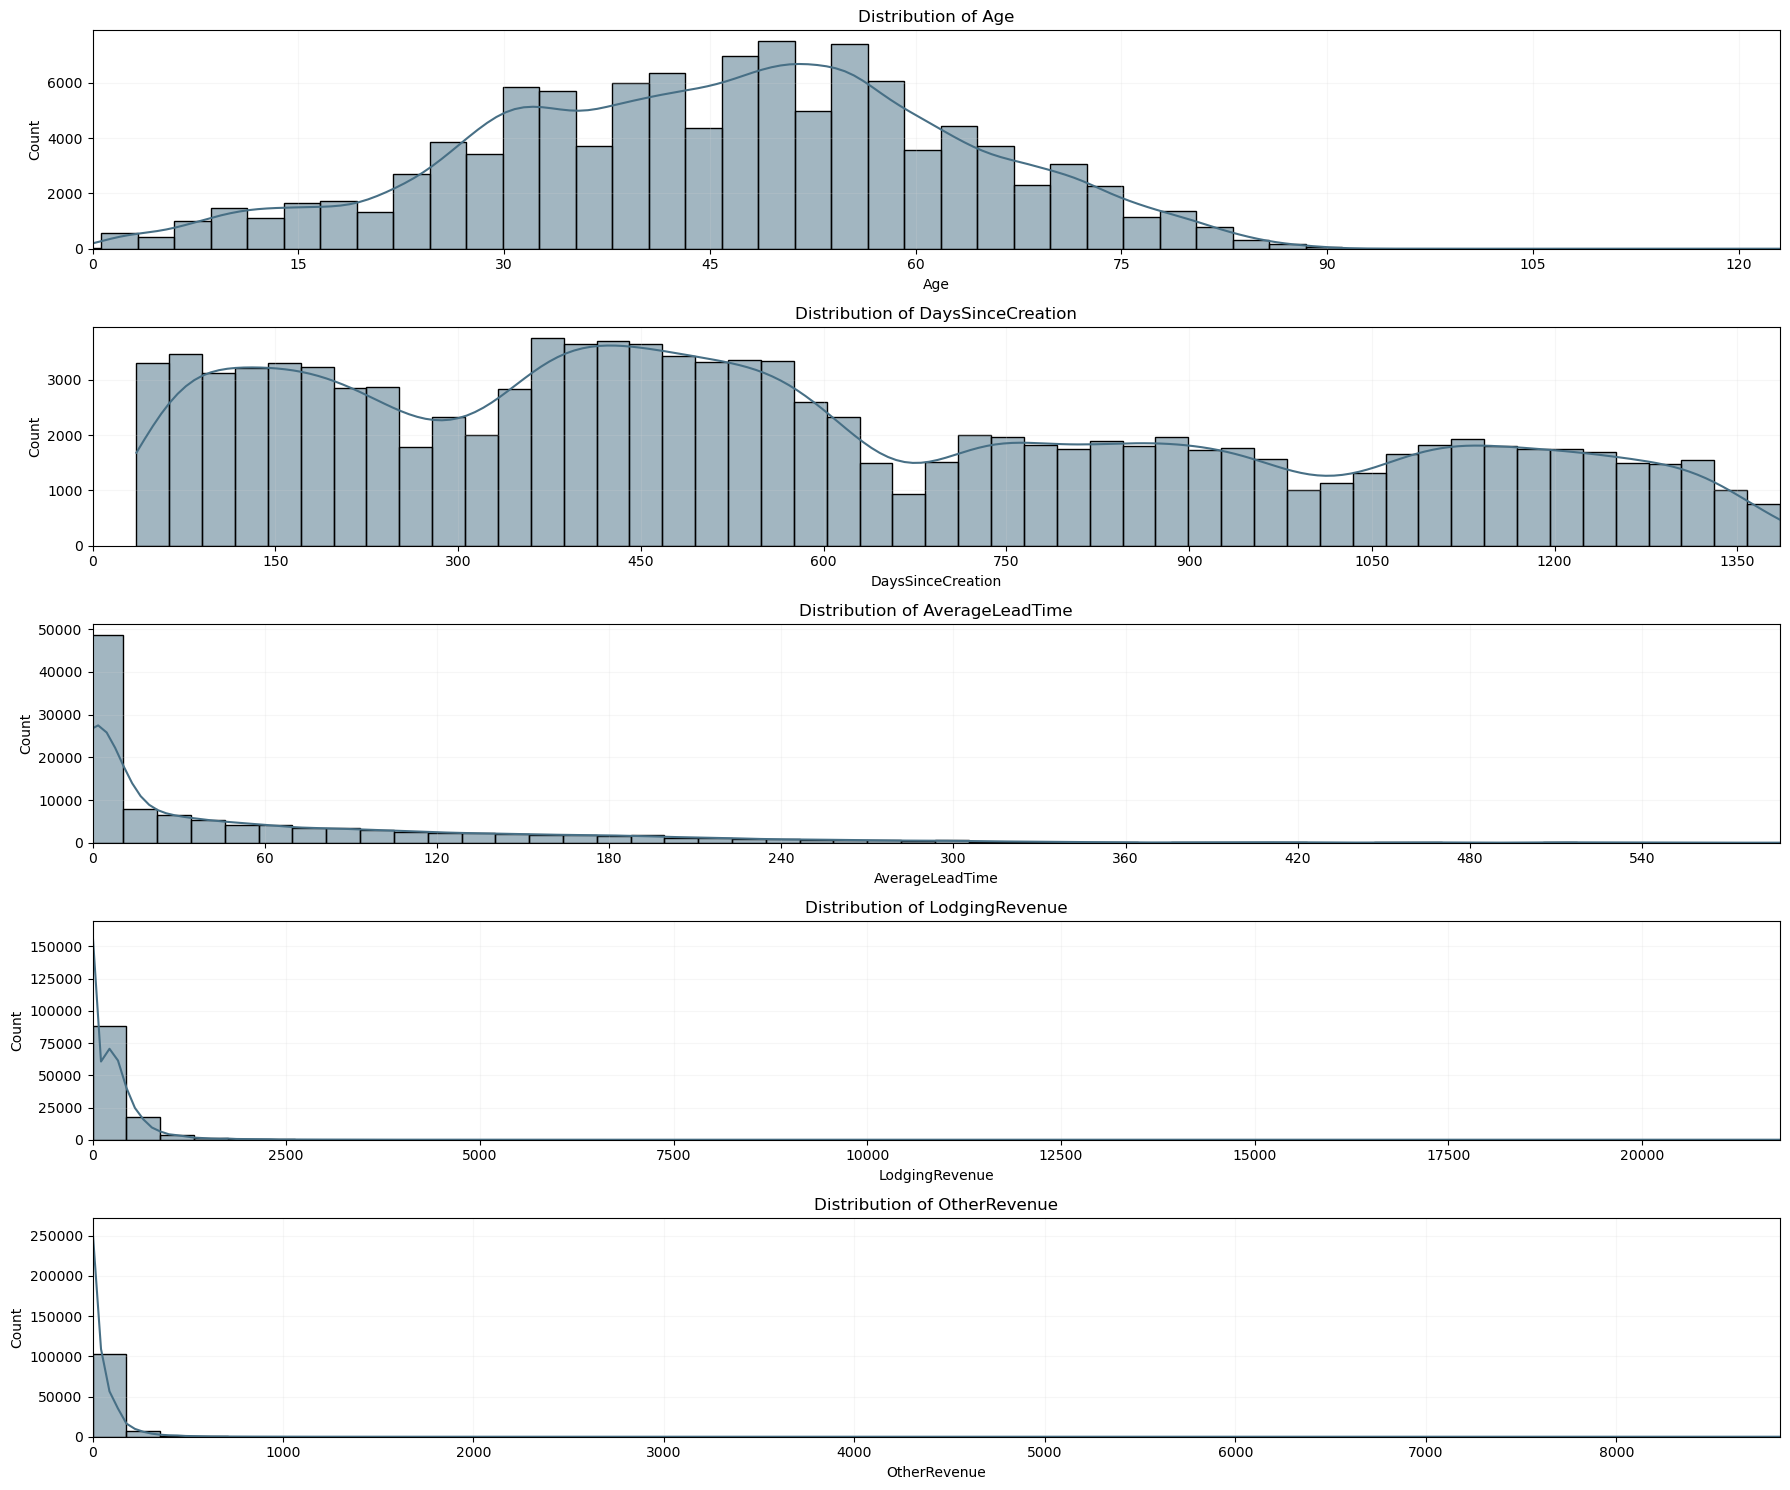

In [166]:
# Histogram for continuous_columns - Original
num_cols = 1
num_rows = (len(numeric_continuous_original) + num_cols - 1) // num_cols 
plot_histograms(df_eda, numeric_continuous_original, num_rows, num_cols)

- `Age`: The distribution appears to be approximately normal, with most values concentrated around the middle range (30-60 years old). There are few very young or very old customers. Middle-aged individuals may have greater financial stability and a stronger desire for comfort, making them willing to spend more and more frequently on accommodations.

- `DaysSinceCreation`: More frequency in lower values and a gradual decline as values increase. This suggests that most accounts were created recently.

- `AverageLeadTime`, `LodgingRevenue`, `OtherRevenue`,`BookingsCanceled`,`BookingsNoShowed`, `BookingsCheckedIn`, `PersonsNights`, `RoomNights` are highly right-skewed, with most values concentrated near zero and a few extreme cases. This suggests that the majority of bookings are short stays, generate low additional revenue, and have minimal cancellations or no-shows. However, there are occasional high-value outliers, indicating a small subset of customers who book well in advance, stay longer, or spend significantly more.

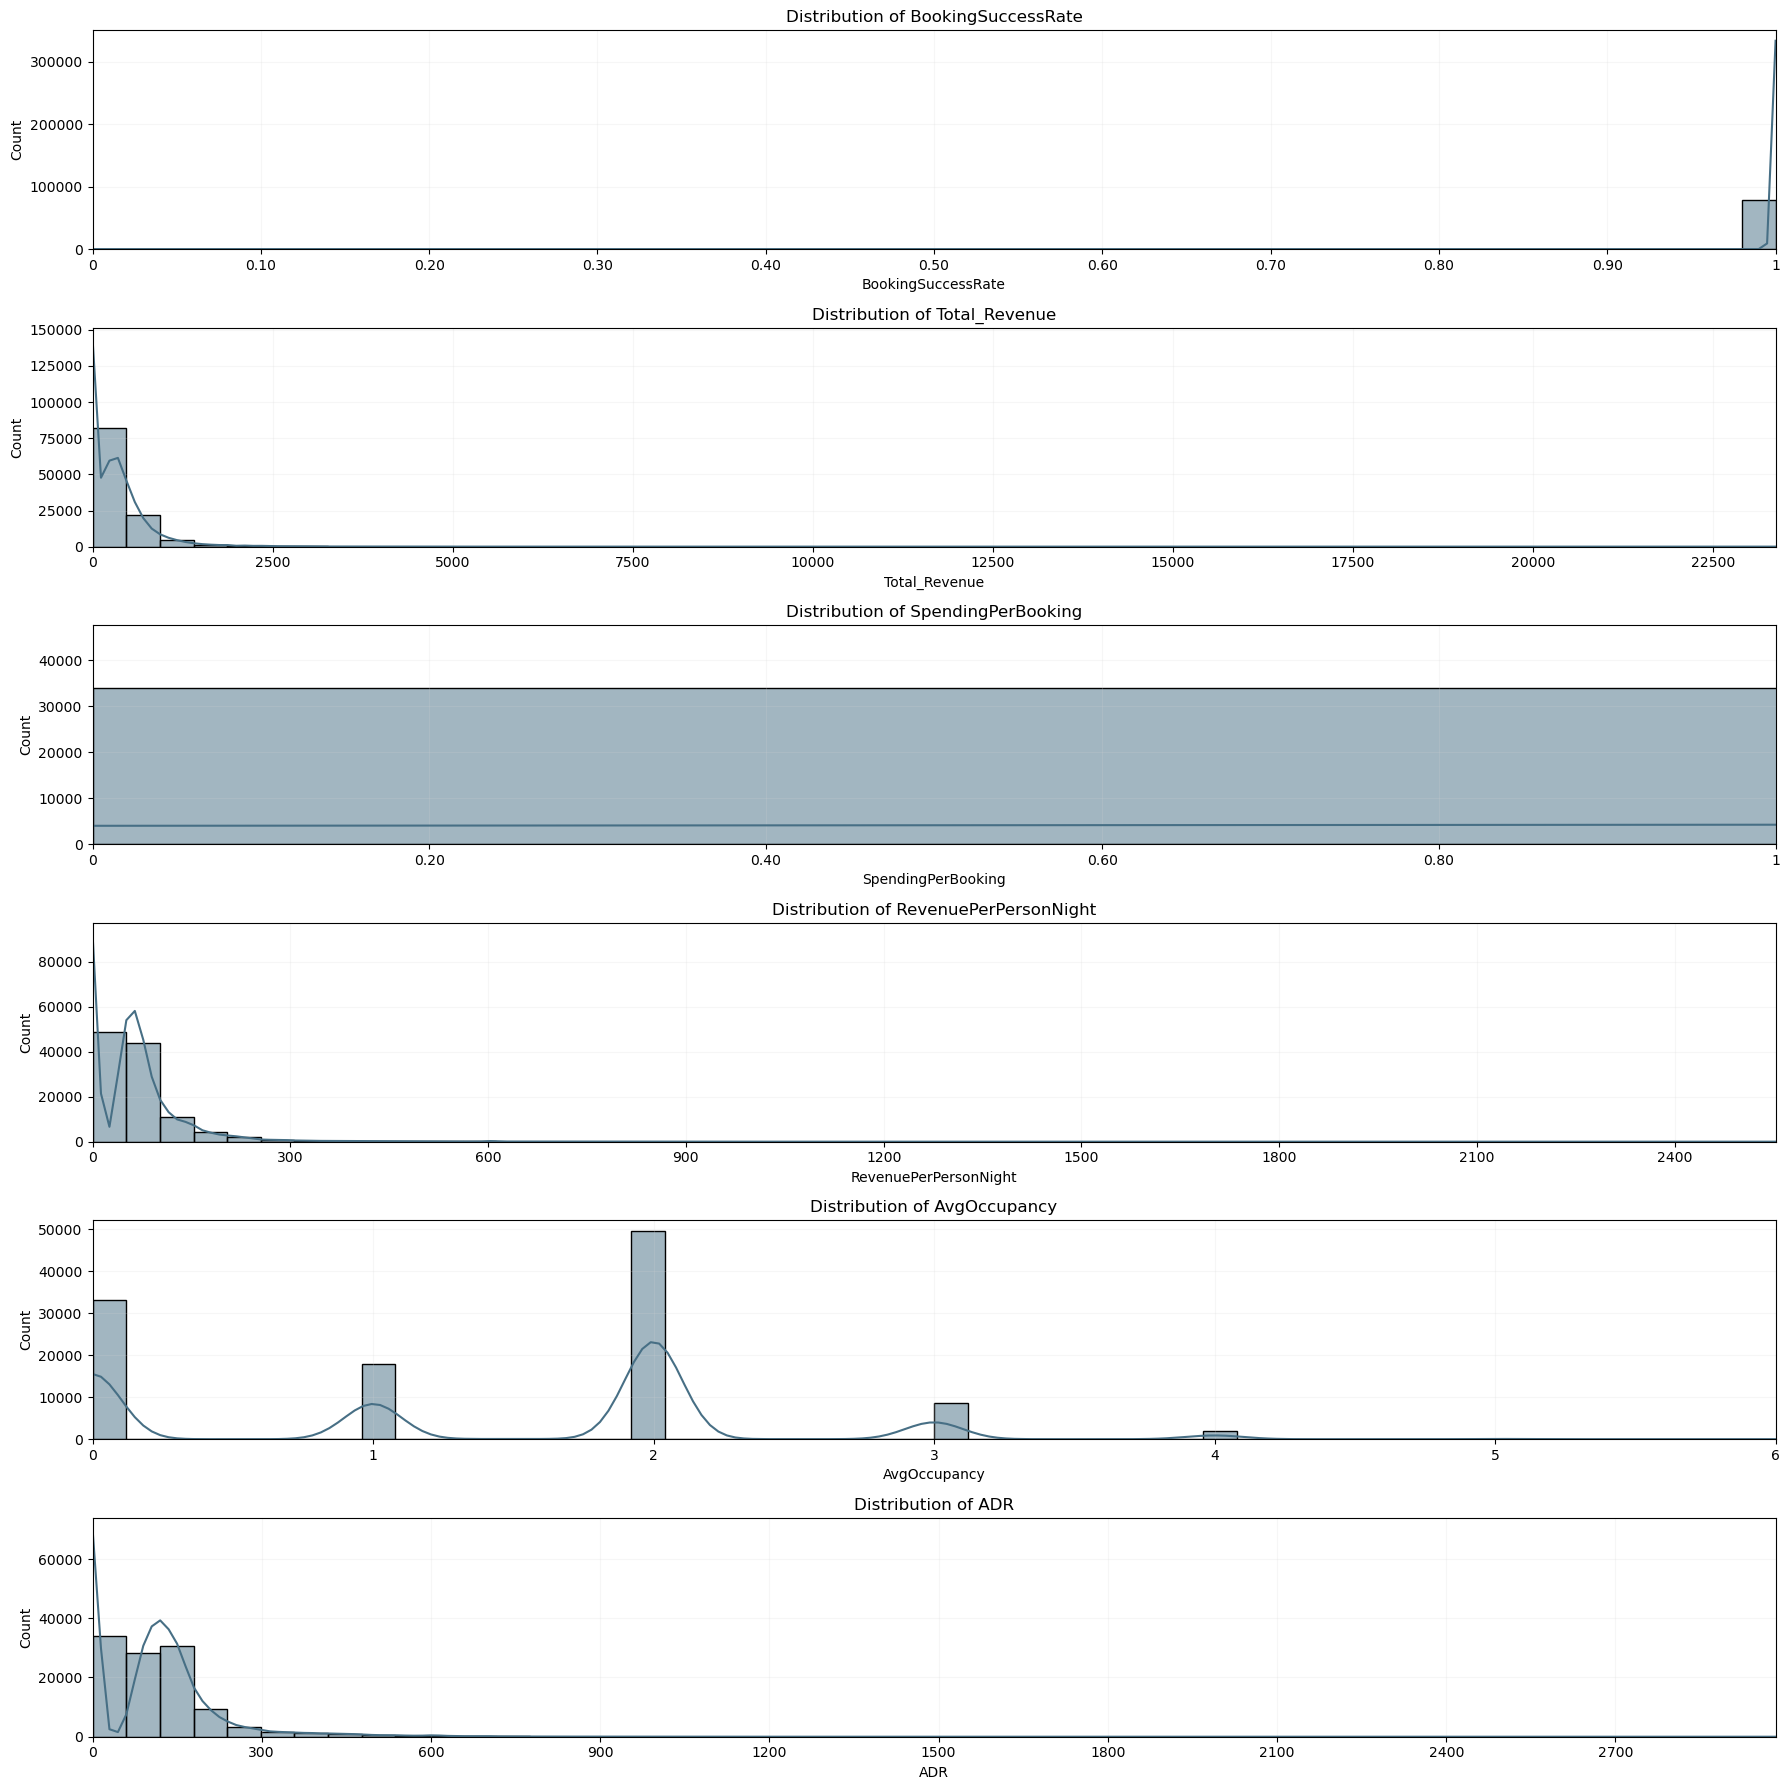

In [170]:
# Histogram for continuous_columns - New
num_cols = 1
num_rows = (len(numeric_continuous_new) + num_cols - 1) // num_cols 
plot_histograms(df_eda, numeric_continuous_new, num_rows, num_cols)

In [175]:
erro na sepending per booking - remover a linha neste

SyntaxError: invalid syntax (1051396870.py, line 1)

-
    #### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Outliers Analysis: Box-Plots**</span> <a id='box'></a>  
    _Box-plots help detect extreme values and understand the spread of numerical variables._ 

    ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

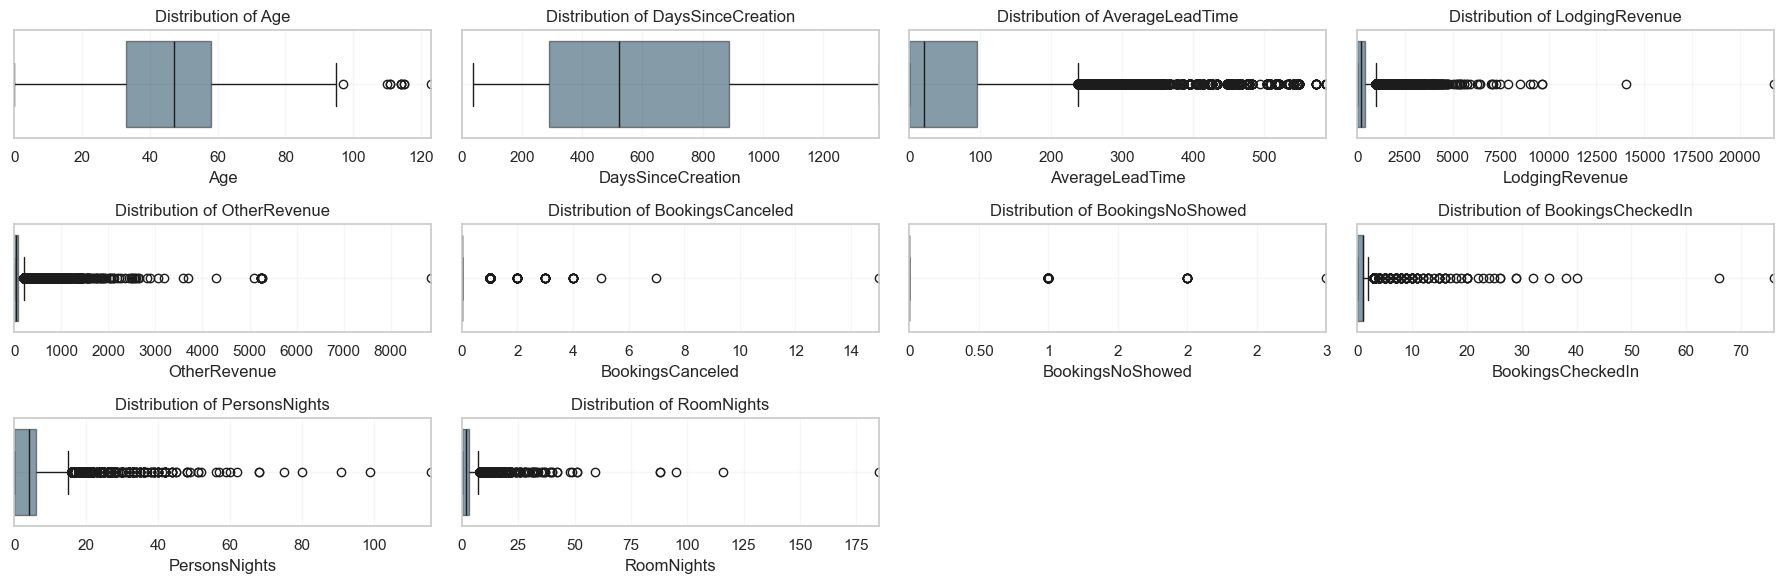

In [256]:
#Blox plot & stats for the numeric_discrete_original & numeric_continuous_original
num_cols = 4
num_rows = (len(numeric_continuous_original + numeric_discrete_original) + num_cols - 1) // num_cols 
stats_df_original = plot_boxplots(df_eda, numeric_continuous_original + numeric_discrete_original, num_rows, num_cols)

In [259]:
stats_df_original

,Variable,Min,Lower Fence,Q1,Median,Q3,Upper Fence,Max
0,Age,-10.0,-4.50,33.0,47.0,58.0,95.50,123.00
1,DaysSinceCreation,36.0,-613.50,288.0,522.0,889.0,1790.50,1385.00
2,AverageLeadTime,-1.0,-142.50,0.0,21.0,95.0,237.50,588.00
3,LodgingRevenue,0.0,-589.95,0.0,208.0,393.3,983.25,21781.00
4,OtherRevenue,0.0,-126.00,0.0,31.0,84.0,210.00,8859.25
5,BookingsCanceled,0.0,0.00,0.0,0.0,0.0,0.00,15.00
6,BookingsNoShowed,0.0,0.00,0.0,0.0,0.0,0.00,3.00
7,BookingsCheckedIn,0.0,-1.50,0.0,1.0,1.0,2.50,76.00
8,PersonsNights,0.0,-9.00,0.0,4.0,6.0,15.00,116.00
9,RoomNights,0.0,-4.50,0.0,2.0,3.0,7.50,185.00


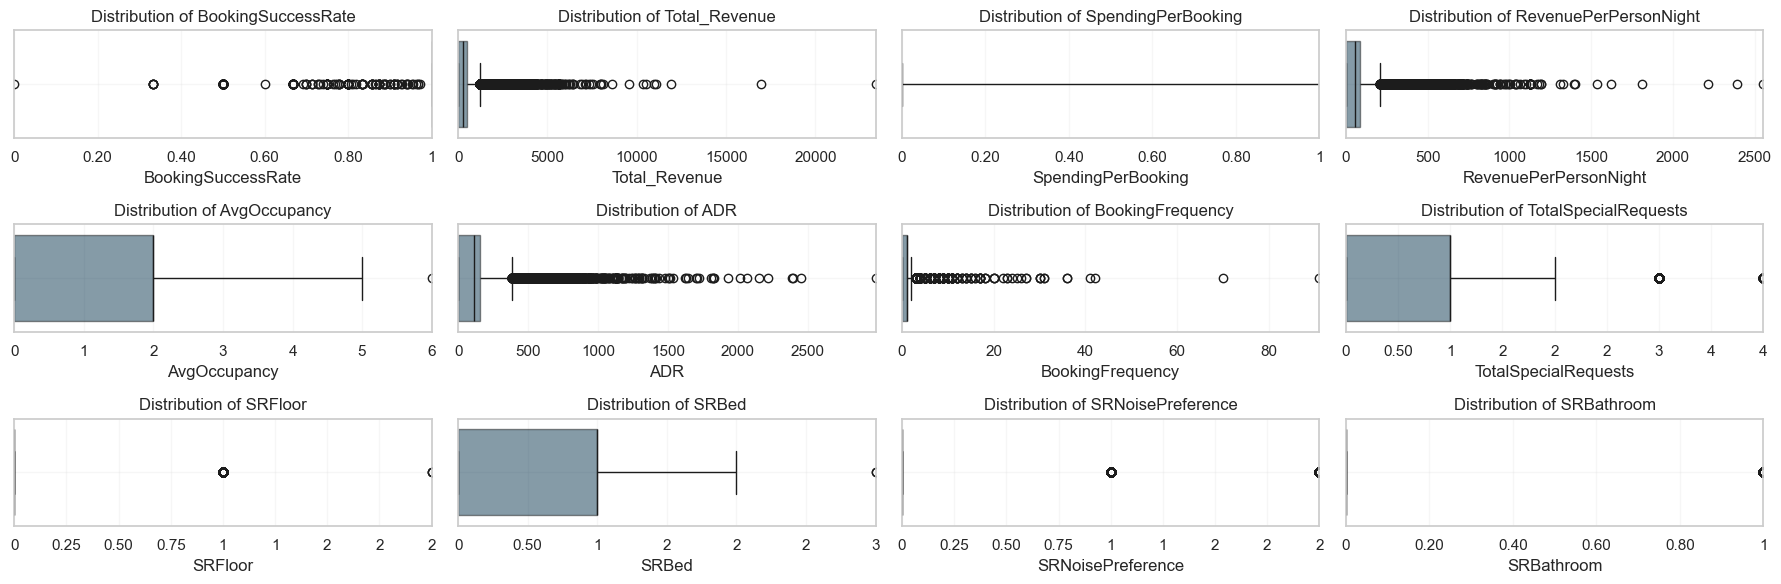

In [263]:
#Blox plot & stats for the numeric_discrete_new & numeric_continuous_new
num_cols = 4
num_rows = (len(numeric_continuous_new + numeric_discrete_new) + num_cols - 1) // num_cols 
stats_df_new = plot_boxplots(df_eda, numeric_continuous_new + numeric_discrete_new, num_rows, num_cols)

In [265]:
stats_df_new

,Variable,Min,Lower Fence,Q1,Median,Q3,Upper Fence,Max
0,BookingSuccessRate,0.0,1.00,1.0,1.00,1.0,1.00,1.00
1,Total_Revenue,0.0,-729.90,0.0,262.00,486.6,1216.50,23365.00
2,SpendingPerBooking,0.0,-291.25,234.5,378.60,585.0,1110.75,inf
3,RevenuePerPersonNight,0.0,-126.75,0.0,57.44,84.5,211.25,2552.75
4,AvgOccupancy,0.0,-3.00,0.0,2.00,2.0,5.00,6.00
5,ADR,0.0,-231.00,0.0,110.00,154.0,385.00,2983.80
6,BookingFrequency,0.0,-1.50,0.0,1.00,1.0,2.50,91.00
7,TotalSpecialRequests,0.0,-1.50,0.0,1.00,1.0,2.50,4.00
8,SRFloor,0.0,0.00,0.0,0.00,0.0,0.00,2.00
9,SRBed,0.0,-1.50,0.0,1.00,1.0,2.50,3.00


-
  #### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Categorical variables: Bar Plots**</span> <a id='bar'></a>  
  _Bar plots provide an overview of categorical variable distributions and highlight dominant categories._  

  ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

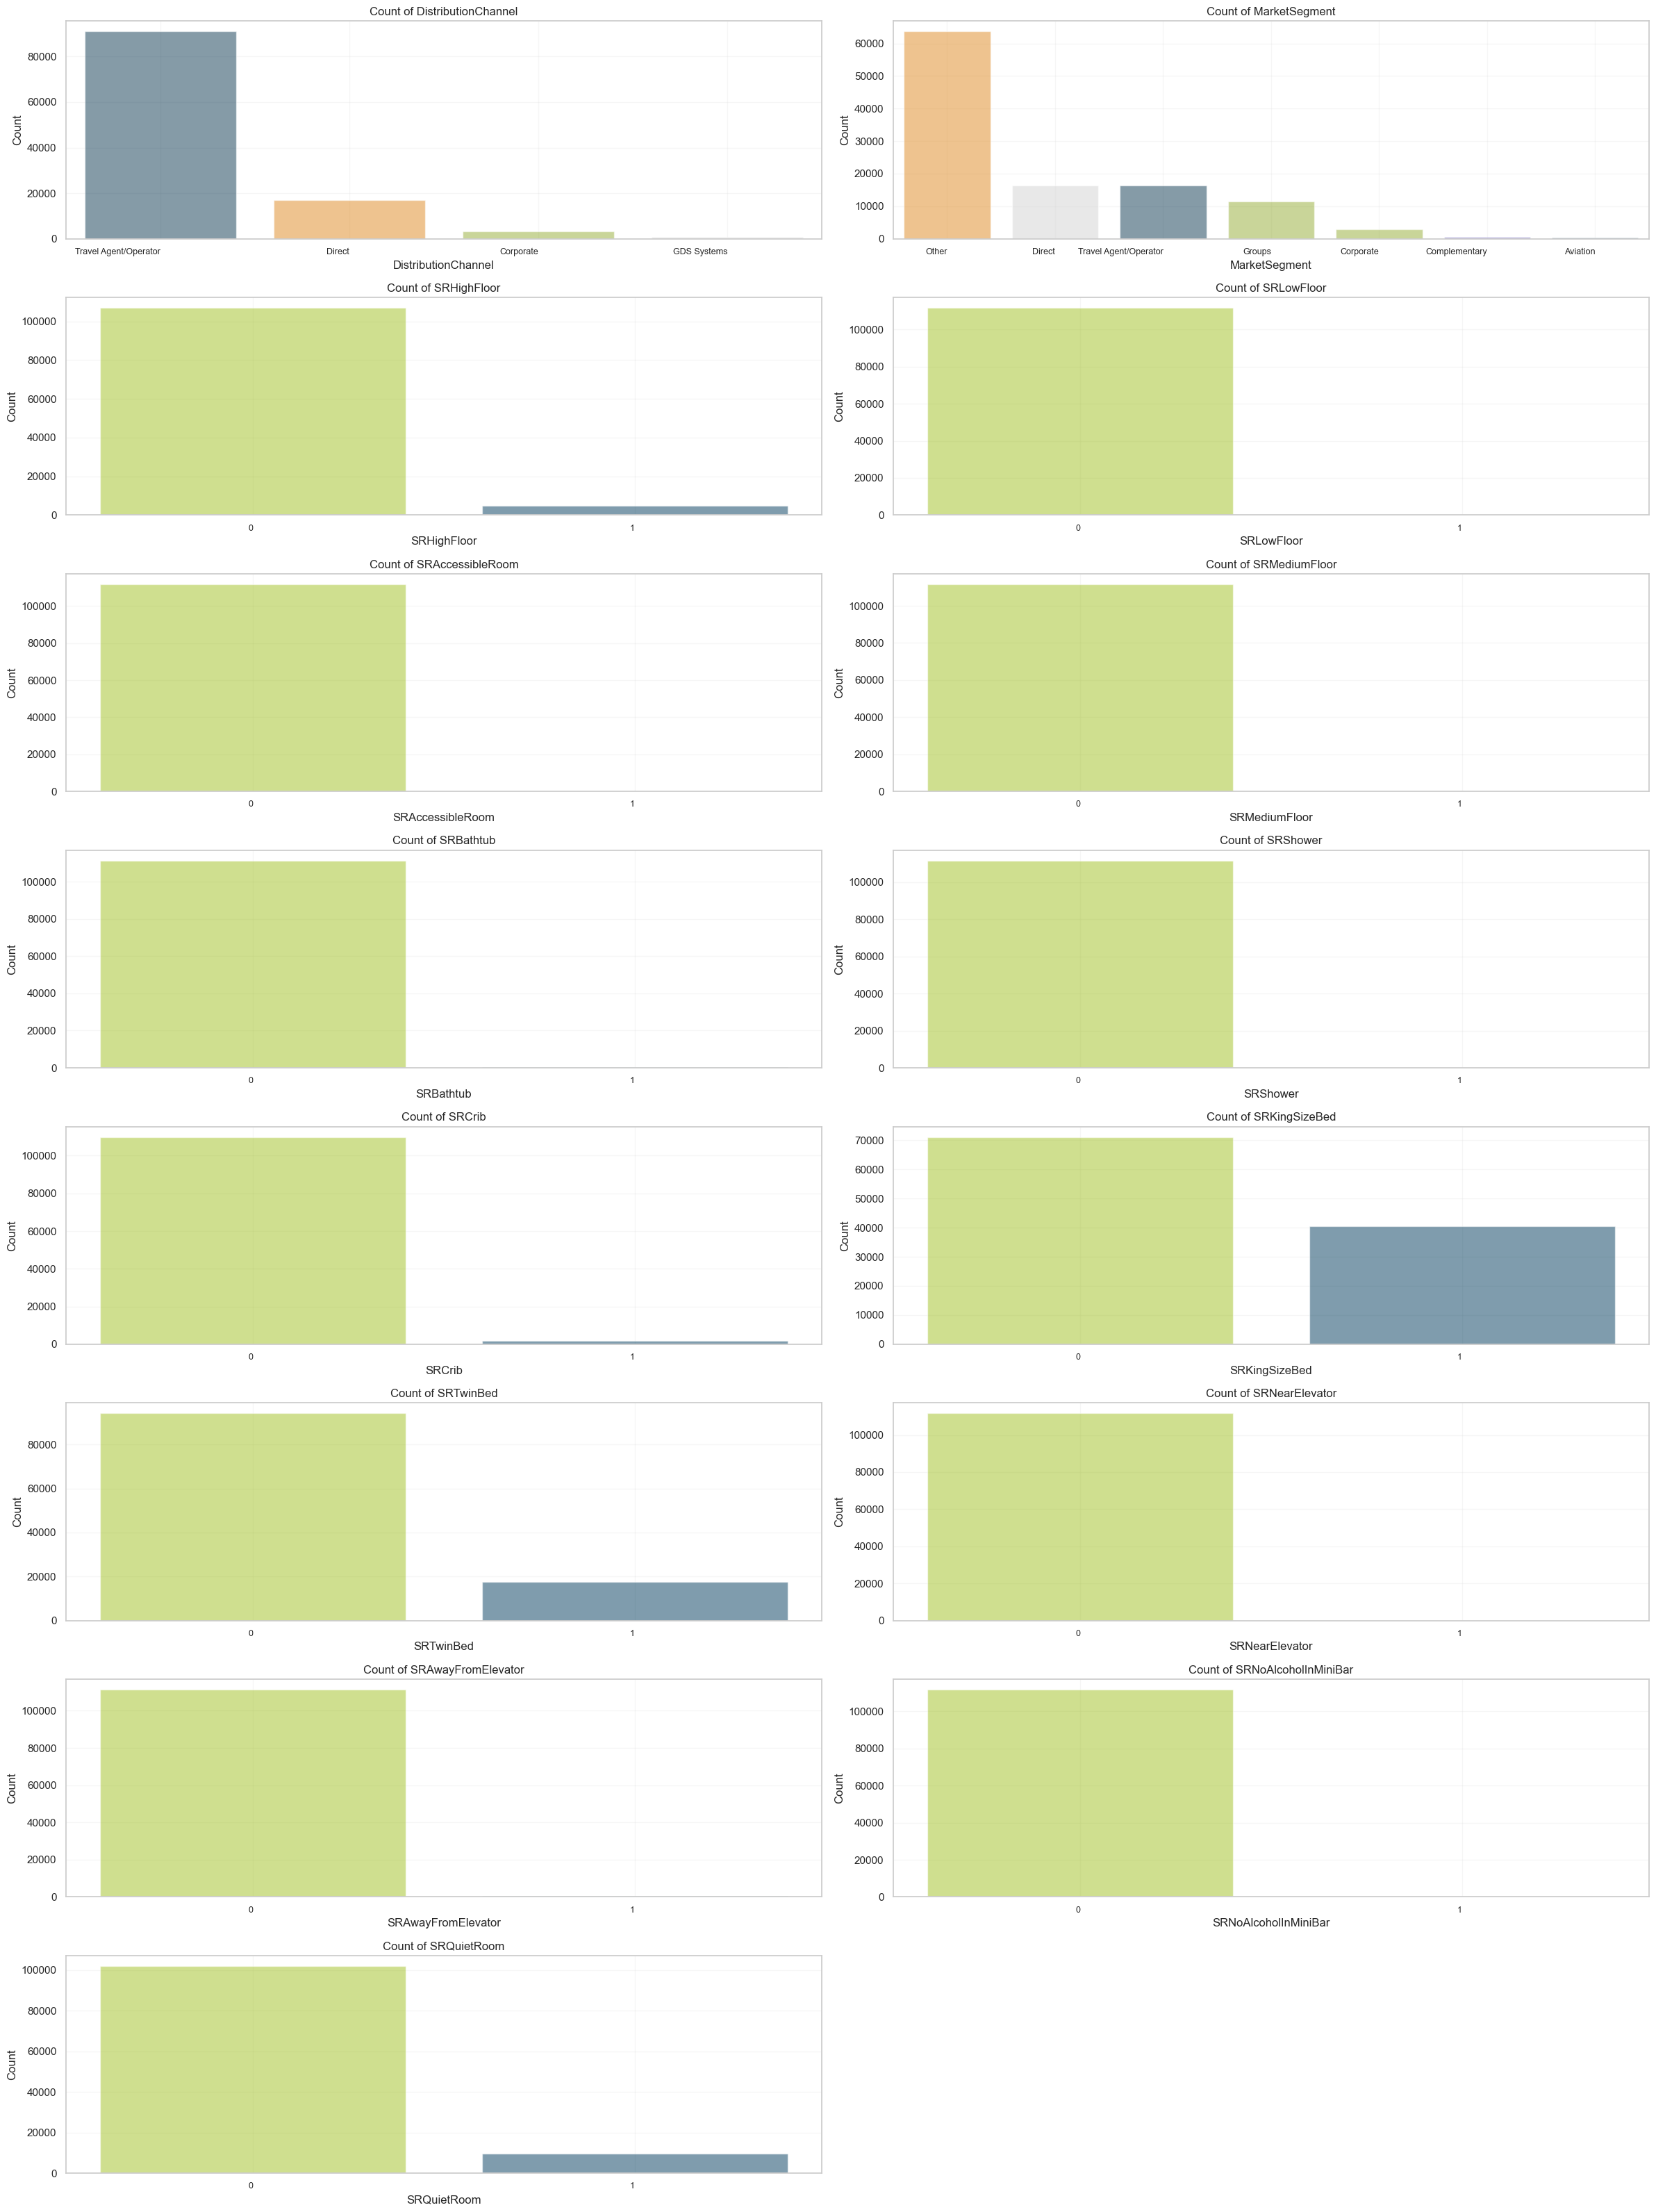

In [253]:
# bar plots for categorical_original
num_cols = 2
num_rows = (len(categorical_original) + num_cols - 1) // num_cols
plot_barplots(df_eda, categorical_original, num_rows, num_cols)

- Clients typically specify a floor preference only when they request a top floor. More specifically, 4.3% of the customers asked for a higher floor.
- There is a nearly null percentage of customers asking for a Bathtub or a Shower. We can conclude these are not important caracteristics for clients when choosing a room.
- 1.6% have ask for a Crib indicating people are staying with babies. This can be an important information for marketing strategies.
- The difference of preferences start to show in the Bed choice, its normal since a lot of platforms ask for this information to assign the bedroom.
- We can also see that a QuietRoom is a important request for 8.8% of the customers. 

-
  #### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Categorical variables: Geographic Map**</span> <a id='GeographicMap'></a>  
  _Geospatial visualizations help analyze data distributions based on location._

  ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

The `Nationality` Bar Plot is difficult to visualize in a bar plot, so we are going to develop a Geographic Map to study this feature distribution.

In [229]:
# Agg the count of visitors by nationality
nationality_counts = df_eda['Nationality'].value_counts().reset_index()
nationality_counts.columns = ['Country', 'VisitorCount']
nationality_counts['Percentage'] = (nationality_counts['VisitorCount'] / nationality_counts['VisitorCount'].sum()) * 100
nationality_counts['Percentage'] = nationality_counts['Percentage'].map('{:.0f}%'.format)
nationality_counts = nationality_counts.sort_values(by='VisitorCount', ascending=False)

nationality_counts.head(20)

,Country,VisitorCount,Percentage
0,FRA,16516,15%
1,DEU,14805,13%
2,PRT,14101,13%
3,GBR,11462,10%
4,ESP,6123,5%
5,USA,5409,5%
6,ITA,4268,4%
7,BEL,4111,4%
8,BRA,4037,4%
9,NLD,3794,3%


**France**, **Germany**, **Portugal** (National customers) and **Great Britain** are our top 4 customer nationality. We can have this biggest categories in mind when we reduce the cardinality of this variable.

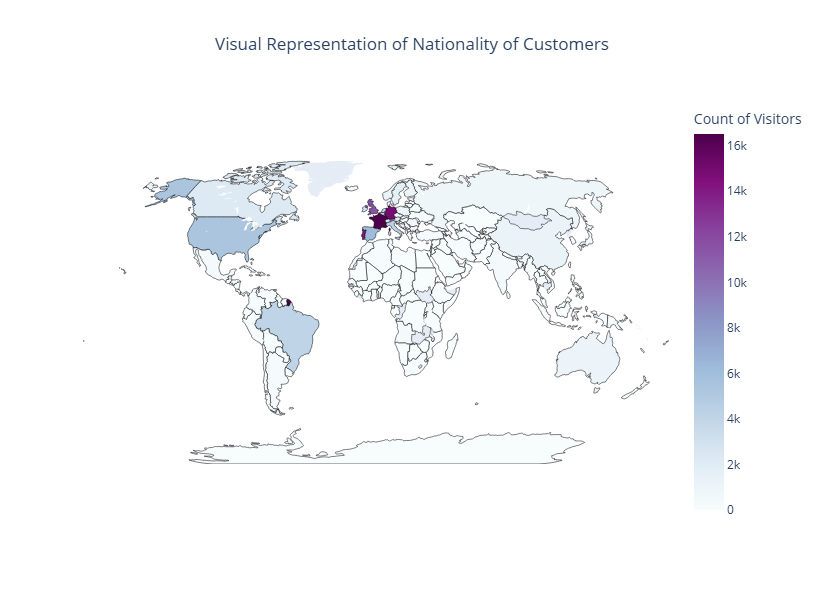

In [225]:
fig = go.Figure(data=go.Choropleth(
    locations=nationality_counts['Country'],
    z=nationality_counts['VisitorCount'],
    text=nationality_counts['Country'],
    colorscale='BuPu',
    autocolorscale=False,
    reversescale=False,
    marker_line_color='black',
    marker_line_width=0.5,
    colorbar_tickprefix='',
    colorbar_title='Count of Visitors'
))

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    ),
    width=1000,  
    height=600,
    title='Visual Representation of Nationality of Customers',
    title_x=0.5,
)

fig.show()

#Adapted from a previous notebook and learned from https://www.youtube.com/watch?v=_FQMD-TpBpM

---
#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Bivariate EDA: Data Visualization**</span> <a id='Bivariate-Vizualization'></a>  
_Exploring relationships between pairs of variables to detect correlations and dependencies._  

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

-
    #### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Numeric-Numeric: Correlations**</span> <a id='NNCorrelations'></a>  
    _Correlation analysis reveals linear relationships between numerical variables._ 

    ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

-
    #### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Numeric-Categorical: Correlations**</span> <a id='NCCorrelations'></a>  
    _Analyzing the influence of categorical variables on numerical features._
    
    ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

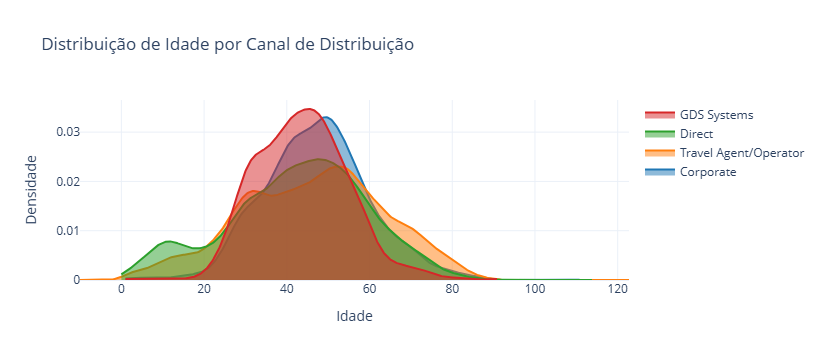

In [203]:
distributions = [df_eda[df_eda['DistributionChannel'] == channel]['Age'].dropna() 
                 for channel in df_eda['DistributionChannel'].unique()]
fig = ff.create_distplot(distributions, 
                         group_labels=df_eda['DistributionChannel'].unique(), 
                         show_hist=False, show_rug=False)
for i in range(len(fig.data)):
    fig.data[i].update(fill='tozeroy', opacity=0.5)  
    
# Personalizar layout
fig.update_layout(title="Distribuição de Idade por Canal de Distribuição",
                  xaxis_title="Idade",
                  yaxis_title="Densidade",
                  template="plotly_white")

fig.show()

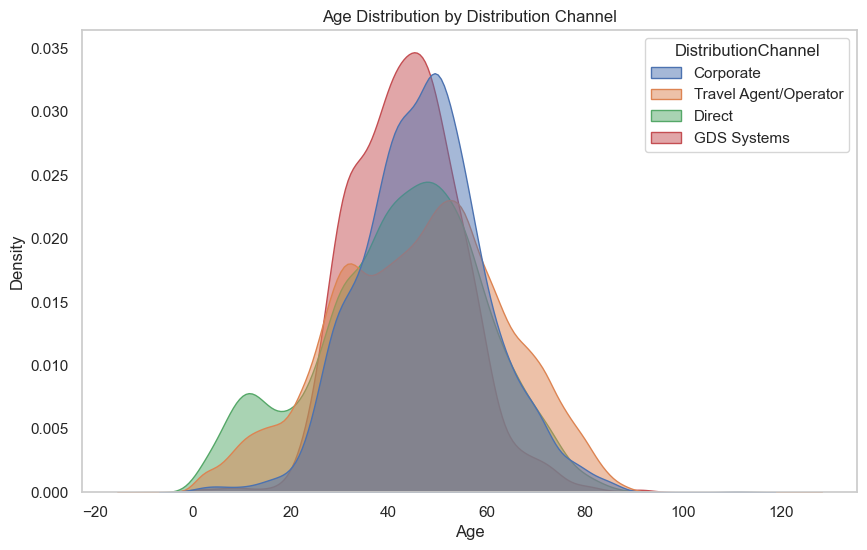

In [195]:
# Create the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_eda, x='Age', hue='DistributionChannel', fill=True, common_norm=False, alpha=0.5, legend=True)

# Customize the plot
plt.title('Age Distribution by Distribution Channel')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(False)
plt.show()

-
    #### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Categorical-Categorical: Cross-tabulations**</span> <a id='CCCross-tabulations'></a>  
    _Cross-tabulations highlight relationships between categorical variables._ 
    
    ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

---
#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Multivariate EDA: Duplicates**</span> <a id='Multivariate'></a>  
_Checking for duplicate entries that might affect analysis._ 

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

-
  #### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Old Segmentation Vs. All**</span> <a id='old-segmentation'></a>  
  _Comparing previous segmentation approach with the full dataset._  
  
  ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

-
  #### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Duplicates**</span> <a id='duplicatesdu'></a>  
  _Detecting and handling duplicate records._   

  ##### Click [here](#table-of-contents) ⬆️ to return to the Index.

---
#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Market Basket Analysis**</span> <a id='MBA'></a>  
_Applying association rule learning techniques to find patterns in customer behavior._  

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

In [30]:
#this function will be reuse to format the axis

def format_func(value, tick_number):
    if value == 0:
        return '0'
    elif value < 1:
        return f'{value:.2f}'
    else:
        return f'{value:.0f}'  

In [31]:
def plot_boxplots(data, columns, num_rows, num_cols):
    total_plots = len(columns)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 2 * num_rows))
    axs = axs.flatten() if num_rows * num_cols > 1 else [axs]  

    stats = [] 

    for i, col in enumerate(columns):
        if i < len(axs):  
            # Create the boxplot
            boxplot = sns.boxplot(x=data[col], ax=axs[i], color=pal_novaims[1])  

            # Apply alpha to the boxplot elements
            for patch in boxplot.patches:
                patch.set_alpha(0.5)

            axs[i].set_title(f'Distribution of {col}')
            axs[i].set_xlabel(col)  
            axs[i].set_ylabel('')  
            axs[i].grid(color='lightgray', alpha=0.2)

            axs[i].xaxis.set_major_formatter(FuncFormatter(format_func))
            max_value = data[col].dropna().max() 
            if np.isfinite(max_value):
                axs[i].set_xlim(0, max_value)  
            else:
                axs[i].set_xlim(0, 1)  

            # IQR statistics
            q1 = data[col].quantile(0.25)
            median = data[col].median()
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lower_fence = q1 - 1.5 * iqr
            upper_fence = q3 + 1.5 * iqr
            min_val = data[col].min()
            max_val = data[col].max()
            stats.append([col, min_val, lower_fence, q1, median, q3, upper_fence, max_val])
            
    for j in range(len(columns), num_rows * num_cols):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

    return pd.DataFrame(stats, columns=['Variable', 'Min', 'Lower Fence', 'Q1', 'Median', 'Q3', 'Upper Fence', 'Max'])

### <span style="background-color:#accbf1; padding:5px; border-radius:5px;"> 📌 Data Preparation</span> <a id='data-preparation'></a>

- **[Data Types](#data-types)**  
- **[Duplicates](#duplicates)**  
- **[Missing values](#missing-values)**  
    - [K-Nearest Neighbor Imputation](#knn) 
    - [SimpleImputer or Most Frequent Imputation](#mfv) 
- **[Inconsistencies](#inconsistencies)**  
- **[Feature Engineering](#feature-engineering)**  
- **[Outliers](#outliers)**  
    - **Detection:**  
        - [Z-Score](#z-score)  
        - [IQR (Interquartile Range)](#iqr)  
        - [DBSCAN](#dbscan)  
        - [Local Outlier Factor (LOF)](#lof)  
    - **Handling Strategies:**  
        - [Removal](#outlier-removal)  
        - [Winsorization](#winsorization)  
        - [Transformation (e.g., Log, Box-Cox)](#transformation)  
- **[Encoding](#encoding)**  
- **[Normalization & Scaling](#scaling)**  
    - **Methods:**
        - [Standard Scaling](#std-scaling)
        - [Min-Max Scaling](#min-max-scaling)
        - [Robust Scaling](#robust-scaling) 
        - [Standardization (Z-Score)](#standardization)  
        - [Log Transformation](#log-transformation)  
        - [Power Transform (Box-Cox, Yeo-Johnson)](#power-transform)  
- **[Variable pre-selection](#variable-preselection)**  
- **[Dimensionality reduction](#dimensionality-reduction)**  
    - [PCA](#pca)  
    - [t-SNE](#tsne)  
    - [UMAP](#umap)
 
<br>

- <span style="background-color:#accbf1; padding:5px; border-radius:5px;"> **[Final Pipeline](#final-pipeline)** </span>

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

---

In [350]:
df_preparation = df.copy()

---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Data Types**</span> <a id='data-types'></a>
_By reducing memory consumption, we can enhance the performance of subsequent sections, including **feature engineering, clustering algorithms, and distance-based models**. Since these algorithms rely on calculating distances between points, reducing memory usage and optimizing data structures can significantly improve their computational efficiency._

In [352]:
df_preparation.dtypes

Nationality              object
Age                     float64
DaysSinceCreation         int64
NameHash                 object
DocIDHash                object
AverageLeadTime           int64
LodgingRevenue          float64
OtherRevenue            float64
BookingsCanceled          int64
BookingsNoShowed          int64
BookingsCheckedIn         int64
PersonsNights             int64
RoomNights                int64
DistributionChannel      object
MarketSegment            object
SRHighFloor               int64
SRLowFloor                int64
SRAccessibleRoom          int64
SRMediumFloor             int64
SRBathtub                 int64
SRShower                  int64
SRCrib                    int64
SRKingSizeBed             int64
SRTwinBed                 int64
SRNearElevator            int64
SRAwayFromElevator        int64
SRNoAlcoholInMiniBar      int64
SRQuietRoom               int64
dtype: object

**Problems:**  

Numerical Columns: 

- The `Age` column assumes a float format because, as seen before, it contains missing values. In Pandas, any numeric column with missing values is automatically assigned a float data type to accommodate them.  

- Furthermore, the current int/float data types seem excessive for the values stored in these columns. The only ones with relatively large values are the revenue-related columns (`LodgingRevenue` and `OtherRevenue`). However, even for them, using a `float64` data type, which can represent an extremely large range of values, is unnecessary. Optimizing these data types will help **reduce memory usage** and **improve processing efficiency**, which is particularly important for large datasets.  

Categorical Columns: 
- Apart from the `NameHash` and `DocIdHash`, the other categorical columns contain few distinct categories considering the total rows. 
- For example, the 199 unique values in the column `Nationality`, out of +100k rows, results in a low cardinality ratio (~0.2%) when we're considering **data type optimization**. In this case, using the category type is an appropriate choice because it stores each unique value as an integer ID, rather than storing the full string values. This is memory-efficient and makes the column easier to handle during data processing.
- However, even though 199 unique values might be considered low cardinality for optimizing data types, it can still be viewed as high cardinality when preparing the column for encoding. This is because encoding techniques such as one-hot encoding or label encoding can result in too many features or too many distinct values that may not contribute significantly to the model's performance. High cardinality columns can cause the curse of dimensionality, leading to overfitting and increased computational costs.
- Therefore, while we treat the column as low cardinality for data type optimization (using category), we must consider further reducing the cardinality before encoding. 


Final Notes:

- One important note: as mentioned earlier, the `Age` column will remain in float format for now because it contains missing values. We will handle these missing values in the next section, and only after that will we convert `Age` to its correct integer format. This transformation will be **integrated into the final data processing pipeline** to ensure consistency throughout the workflow. 

In [356]:
def reduce_memory_usage(df):
    """ 
    Optimize data types to reduce memory usage:
    - Converts integers to the smallest possible int type.
    - Converts floats to the smallest possible float type.
    - Converts object columns to category if unique values are below a threshold.
    """
    df = df.copy()
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Initial memory usage: {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        # Skip categorical columns
        if isinstance(col_type, pd.CategoricalDtype):
            continue

        # Optimize integer columns
        if np.issubdtype(col_type, np.integer):
            c_min, c_max = df[col].min(), df[col].max()
            if c_min >= np.iinfo(np.int8).min and c_max <= np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min >= np.iinfo(np.int16).min and c_max <= np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min >= np.iinfo(np.int32).min and c_max <= np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.int64)

        # Optimize float columns
        elif np.issubdtype(col_type, np.floating):
            c_min, c_max = df[col].min(), df[col].max()
            if df[col].isna().any():
                if c_min >= np.finfo(np.float16).min and c_max <= np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min >= np.finfo(np.float32).min and c_max <= np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
            else:
                if (df[col] % 1 == 0).all():
                    if c_min >= np.iinfo(np.int8).min and c_max <= np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif c_min >= np.iinfo(np.int16).min and c_max <= np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif c_min >= np.iinfo(np.int32).min and c_max <= np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    else:
                        df[col] = df[col].astype(np.int64)
                else:
                    if c_min >= np.finfo(np.float16).min and c_max <= np.finfo(np.float16).max:
                        df[col] = df[col].astype(np.float16)
                    elif c_min >= np.finfo(np.float32).min and c_max <= np.finfo(np.float32).max:
                        df[col] = df[col].astype(np.float32)
                    else:
                        df[col] = df[col].astype(np.float64)

        # Convert object columns to category if unique values are below a threshold
        elif df[col].dtype == 'object':
            num_unique = df[col].nunique()
            num_total = len(df[col])
            if num_unique / num_total < 0.5:  # Convert if unique values < 50% of total rows
                df[col] = df[col].astype('category')

    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Optimized memory usage: {end_mem:.2f} MB")
    print(f"Memory reduced by {100 * (start_mem - end_mem) / start_mem:.1f}%")
    
    return df

In [357]:
def reduce_memory_usage(df):
    """ 
    Optimize data types to reduce memory usage:
    - Converts integers to the smallest possible int type.
    - Converts floats to the smallest possible float type (at least float32).
    - Converts object columns to category if unique values are below a threshold.
    ✅ Evita float16 para prevenir erros de overflow/underflow.
    ✅ Mantém os float como float32 pelo menos, garantindo compatibilidade com cálculos estatísticos.
    """
    df = df.copy()
    start_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Initial memory usage: {start_mem:.2f} MB")

    for col in df.columns:
        col_type = df[col].dtype

        # Skip categorical columns
        if isinstance(col_type, pd.CategoricalDtype):
            continue

        # Optimize integer columns
        if np.issubdtype(col_type, np.integer):
            c_min, c_max = df[col].min(), df[col].max()
            if c_min >= np.iinfo(np.int8).min and c_max <= np.iinfo(np.int8).max:
                df[col] = df[col].astype(np.int8)
            elif c_min >= np.iinfo(np.int16).min and c_max <= np.iinfo(np.int16).max:
                df[col] = df[col].astype(np.int16)
            elif c_min >= np.iinfo(np.int32).min and c_max <= np.iinfo(np.int32).max:
                df[col] = df[col].astype(np.int32)
            else:
                df[col] = df[col].astype(np.int64)

        # Optimize float columns (avoid float16 to prevent precision issues)
        elif np.issubdtype(col_type, np.floating):
            c_min, c_max = df[col].min(), df[col].max()
            if c_min >= np.finfo(np.float32).min and c_max <= np.finfo(np.float32).max:
                df[col] = df[col].astype(np.float32)
            else:
                df[col] = df[col].astype(np.float64)

        # Convert object columns to category if unique values are below a threshold
        elif df[col].dtype == 'object':
            num_unique = df[col].nunique()
            num_total = len(df[col])
            if num_unique / num_total < 0.5:  # Convert if unique values < 50% of total rows
                df[col] = df[col].astype('category')

    end_mem = df.memory_usage(deep=True).sum() / 1024**2
    print(f"Optimized memory usage: {end_mem:.2f} MB")
    print(f"Memory reduced by {100 * (start_mem - end_mem) / start_mem:.1f}%")
    
    return df

In [358]:
optimized_df = reduce_memory_usage(df_preparation)

Initial memory usage: 63.65 MB
Optimized memory usage: 29.46 MB
Memory reduced by 53.7%


In [362]:
optimized_df.dtypes

Nationality             category
Age                      float32
DaysSinceCreation          int16
NameHash                  object
DocIDHash                 object
AverageLeadTime            int16
LodgingRevenue           float32
OtherRevenue             float32
BookingsCanceled            int8
BookingsNoShowed            int8
BookingsCheckedIn           int8
PersonsNights               int8
RoomNights                 int16
DistributionChannel     category
MarketSegment           category
SRHighFloor                 int8
SRLowFloor                  int8
SRAccessibleRoom            int8
SRMediumFloor               int8
SRBathtub                   int8
SRShower                    int8
SRCrib                      int8
SRKingSizeBed               int8
SRTwinBed                   int8
SRNearElevator              int8
SRAwayFromElevator          int8
SRNoAlcoholInMiniBar        int8
SRQuietRoom                 int8
dtype: object

As expected, `Age` is still a float, but now we can proced to correct the missing values issue.

---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Duplicates**</span> <a id='duplicates'></a>
_We saw before that we have 111 total missing values (all the columns the same), but we also need to see if we have customers with the same NameHash and DocIDHash combination because this can be a duplicate record of the same customer and we need to merge the information of these customers._

In [366]:
duplicates = optimized_df[optimized_df.duplicated(keep=False)]
duplicates.head(10)

,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
594,ROU,38.0,1365,0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...,0x9CD129744684370C750190DB02D767653BB96C8119B3...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
595,ROU,38.0,1365,0x71AD7B2E07CAD82195B968B7CDD7961EC953760899B5...,0x9CD129744684370C750190DB02D767653BB96C8119B3...,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0
701,BRA,26.0,1359,0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...,0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...,0,0.0,0.0,0,0,0,0,0,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
702,BRA,26.0,1359,0x74E713DA50B1E31F73E557BE97E695F2F91DF974EFCD...,0xB4945744933DB61354AEE815E46203B3BEA62AA339A0...,0,0.0,0.0,0,0,0,0,0,Corporate,Groups,0,0,0,0,0,0,0,0,0,0,0,0,0
1110,PRT,NaN,1345,0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
1111,PRT,NaN,1345,0x517974F81AFEBB5A7D7364B258EF7E3536190C01850F...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0
1377,PRT,NaN,1340,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
1391,PRT,NaN,1340,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0
1403,PRT,NaN,1340,0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...,NaN,0,0.0,0.0,0,0,0,0,0,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0


We aim to investigate whether repeated or missing values in certain columns can reveal the source of duplicates and help prevent them in the future. By analyzing which columns have identical values across duplicates, we may identify patterns indicating systemic issues. If duplicates frequently contain NaNs, this could suggest data entry problems. Additionally, tracking duplicates over time can show whether the issue was more common in the past or is ongoing. Identifying these patterns allows us to pinpoint potential causes and take corrective actions to improve data integrity.

In [369]:
# Identify columns where all values are identical across duplicates
common_columns = duplicates.nunique() == 1
common_columns = common_columns[common_columns].index.tolist()

# Extract the first value for each common column (since all are identical)
common_values = {col: duplicates[col].iloc[0] for col in common_columns}

print("Columns with identical values in duplicates and their values:")
for col, val in common_values.items():
    print(f"{col}: {val}")

Columns with identical values in duplicates and their values:
BookingsCanceled: 0
BookingsNoShowed: 0
SRHighFloor: 0
SRLowFloor: 0
SRAccessibleRoom: 0
SRMediumFloor: 0
SRBathtub: 0
SRShower: 0
SRNearElevator: 0
SRAwayFromElevator: 0
SRNoAlcoholInMiniBar: 0


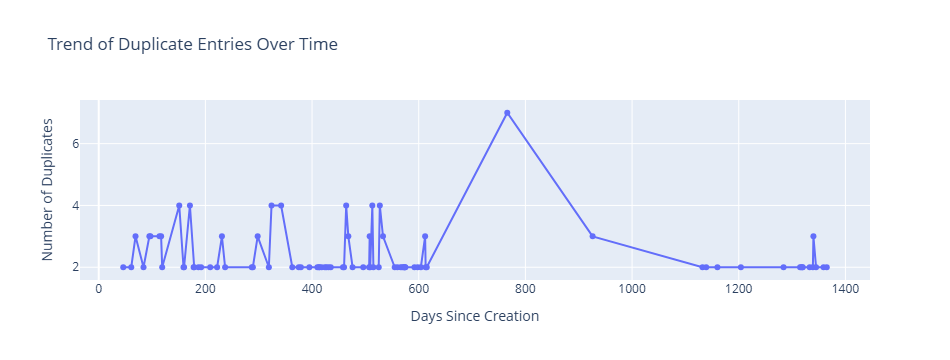

In [370]:
# Count duplicates per DaysSinceCreation
duplicate_counts = duplicates.groupby("DaysSinceCreation").size().reset_index(name="Count")

fig = px.line(
    duplicate_counts, 
    x="DaysSinceCreation", 
    y="Count", 
    markers=True, 
    title="Trend of Duplicate Entries Over Time",
    labels={"DaysSinceCreation": "Days Since Creation", "Count": "Number of Duplicates"})
fig.update_traces(
    hovertemplate="Day: %{x}<br>Duplicates: %{y}")
fig.show()

Nothing particularly incriminating—it's possible that one person made the reservation for a group, and each member checked into their own room, but the staff handling the check-in kept all records under the same name. However, with the current information available, it's difficult to confirm this scenario. 

> We will remove these rows.

In [372]:
optimized_df.drop_duplicates(inplace = True)

Now, the second case (more than one record for the same person), we know that the DocIDHash should be unique, but we notice that we have some non unique ids:

In [375]:
doc_id_counts = optimized_df['DocIDHash'].value_counts()
doc_id_counts = doc_id_counts[doc_id_counts > 1]
doc_id_counts

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    3021
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B      31
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52      24
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076      15
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003      14
                                                                      ... 
0x0B55276B283C2AAE2333E849091AB6FDD31DAA5E6D9C3744F9FDBED802E072E7       2
0x72A57D435849B9E796C9BEF993EE1A88F9B207F26F163A98F3217AB78B63684A       2
0x9775185620EA4FC990A1018F24E0E5376C0ADFFD1145E99391EDDA9994607730       2
0x9F19E7E240FFCAE70B66C2B2160E5CD685734070D0B9EABBF1580E27EC2FDC22       2
0x7BFEA5100BDC372A6A40BD31BE4B43A2735FCDB7A7B3029AF276AD9C7648CE74       2
Name: count, Length: 3060, dtype: int64

We know that having the same **DocIDHash** would typically indicate a single client. However, in some cases, the person checking in might not have their ID with them, leading the operator to enter a placeholder like `"."`, `"Na"`, or another standard value (thats probably why we have 3021 entries of the same Id). 

> Since the hash function is **deterministic**—meaning the same input always produces the same hash—this could result in multiple different guests being assigned the same **DocIDHash**, potentially creating false duplicates.

The problem is that without the DocIDHash, we cannot reliably identify an individual, as people from the same country can have the same name. This makes it difficult to distinguish between different guests, especially in cases where the DocIDHash is missing or replaced with a placeholder. Without a unique identifier, false duplicates may occur, complicating data integrity and analysis.

We will handle three cases:
> 1. A single name appearing multiple times under the same DocIDHash → We assume it's the same person and aggregate their data.
> 
> 2. A single name appearing only once! under a shared DocIDHash → It could be a special case, like a company ID used for different people. We should separate them (just to simplify the final analysis).
> 
> 3. Names appearing multiple times under the DocIDHash with multiple names → This requires further analysis to determine if they are truly the same person or different people. (people from the same country can have the same name)

In [379]:
# Create a dictionary to store names per DocIDHash
doc_id_to_names = defaultdict(lambda: defaultdict(int))
for _, row in optimized_df.iterrows():
    doc_id_to_names[row['DocIDHash']][row['NameHash']] += 1

In [380]:
for doc_id, names_counts in doc_id_to_names.items():
    matching_rows = optimized_df[optimized_df['DocIDHash'] == doc_id]
    
    multiple_occurrences = {name: count for name, count in names_counts.items() if count > 1}
    single_occurrences = {name: count for name, count in names_counts.items() if count == 1}
    
    if len(multiple_occurrences) == 1 and len(single_occurrences) == 0:
        # Case 1: Only one name appears multiple times → Aggregate
        optimized_df.loc[optimized_df['DocIDHash'] == doc_id, 'dup_cases'] = "Case_1"
    else:
        # Case 2 & Case 3 (Mixed or Pure Cases)
        for idx, row in matching_rows.iterrows():
            if row['NameHash'] in single_occurrences:
                optimized_df.at[idx, 'dup_cases'] = "Case_2"
            else:
                optimized_df.at[idx, 'dup_cases'] = "Case_3"

In [382]:
# Categorize Cases
def categorize_case(row):
    doc_id = row['DocIDHash']
    name_counts = doc_id_to_names[doc_id]
    
    multiple_occurrences = {name: count for name, count in name_counts.items() if count > 1}
    single_occurrences = {name: count for name, count in name_counts.items() if count == 1}
    
    if len(multiple_occurrences) == 1 and len(single_occurrences) == 0:
        return "Case_1"
    elif row['NameHash'] in single_occurrences:
        return "Case_2"
    else:
        return "Case_3"

optimized_df['dup_cases'] = optimized_df.apply(categorize_case, axis=1)

In [383]:
#file_path = 'optimized_df.xlsx'
#optimized_df.to_excel(file_path, index=False)

> Case 1: A single name appearing multiple times under the same DocIDHash

In [385]:
optimized_df['index'] = optimized_df.index
agg_functions = {
    'index': 'first',
    'Nationality': 'first',
    'Age': 'max',  
    'DaysSinceCreation': 'max',  # Keep the first DaysSinceCreation (original longevity of the client- if by mistake we create a new file for one of our oldest clients we still want to know that)
    'DocIDHash': 'first',
    'NameHash': 'first',
    'AverageLeadTime': 'mean',  
    'LodgingRevenue': 'sum',  # Sum of LodgingRevenue
    'OtherRevenue': 'sum',  # Sum of OtherRevenue
    'BookingsCanceled': 'sum',  # Sum of BookingsCanceled
    'BookingsNoShowed': 'sum',  # Sum of BookingsNoShowed
    'BookingsCheckedIn': 'sum',  # Sum of BookingsCheckedIn
    'PersonsNights': 'sum',  # Sum of PersonsNights
    'RoomNights': 'sum',  # Sum of RoomNights
    'DistributionChannel': 'last',  # Keep the last DistributionChannel (most recent)
    'MarketSegment': 'last', 
    'SRHighFloor': 'max',  # Maximum value of SRHighFloor
    'SRLowFloor': 'max',  # Maximum value of SRLowFloor
    'SRAccessibleRoom': 'max',  # Maximum value of SRAccessibleRoom
    'SRMediumFloor': 'max',  # Maximum value of SRMediumFloor
    'SRBathtub': 'max',  # Maximum value of SRBathtub
    'SRShower': 'max',  # Maximum value of SRShower
    'SRCrib': 'max',  # Maximum value of SRCrib
    'SRKingSizeBed': 'max',  # Maximum value of SRKingSizeBed
    'SRTwinBed': 'max',  # Maximum value of SRTwinBed
    'SRNearElevator': 'max',  # Maximum value of SRNearElevator
    'SRAwayFromElevator': 'max',  # Maximum value of SRAwayFromElevator
    'SRNoAlcoholInMiniBar': 'max',  # Maximum value of SRNoAlcoholInMiniBar
    'SRQuietRoom': 'max',  # Maximum value of SRQuietRoom
    'dup_cases': 'first'
}

In [386]:
aggregated_df = (
    optimized_df[optimized_df['dup_cases'] == 'Case_1']
    .groupby(['DocIDHash', 'NameHash'])
    .agg(agg_functions)
    .reset_index(drop=True)
)

df_clean = pd.concat([
    optimized_df[optimized_df['dup_cases'] != 'Case_1'],  
    aggregated_df  
], ignore_index=True)

> Case 2: A single name appearing only once! even if under an id with multiple names

In [388]:
# CASE 2: MODIFY DOCIDHASH ---
case_2_mask = (df_clean['dup_cases'] == 'Case_2') & (df_clean['DocIDHash'].isin(doc_id_counts.index))

df_clean.loc[case_2_mask, 'DocIDHash'] = df_clean.loc[case_2_mask].apply(
    lambda row: f"{row['DocIDHash']}_{row['NameHash'][-4:]}", axis=1)

In [389]:
#file_path = 'df_clean.xlsx'
#df_clean.to_excel(file_path, index=False)

With excel we were able to compare individual cases to make sure the tranformations were correct

> Case 3: Uncertain Cases

In [392]:
doc_id_counts2 = df_clean['DocIDHash'].value_counts()
doc_id_counts2 = doc_id_counts2[doc_id_counts2 > 1]
doc_id_counts2

DocIDHash
0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855    344
0xA486FBACF4B4E5537B026743E3FDFE571D716839E758236F42950A61FE6B922B     26
0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECECF45D6BBDBAF9A274FF52     21
0x2A14D03A4827C67E0D39408F103DB417AD496DCE6158F8309E6281185C042003     13
0x469CF1F9CF8C790FFA5AD3F484F2938CBEFF6435BCFD734F687EC6D1E968F076     12
                                                                     ... 
0xC486BF8825FEC62281795F6B940EC902FF88A698E22686F47A31602535A20E59      2
0x50CE1B637E9FB91F785A2EF8F94D5A9F6B1428578DBA678880FDBABE67FDE79A      2
0xD92B371CE845514CAC9D7AA9E16F402B132E5EC5F8F61628D9D56D58EFF8CD0E      2
0x14E48EA6567E552144860BBBECE6B8047894DBBF68D2765BE8DF2A7306C58D74      2
0x3987318C906856558670343730E4F2D428248189543F8DA0BBFBC5E7DE904DC8      2
Name: count, Length: 293, dtype: int64

In [393]:
# Ensure all rows with NaN 'DocIDHash' and 'dup_cases' == 'Case_3' have a sum of 0 for the booking-related columns
assert (df_clean.loc[
            df_clean['DocIDHash'].isna() & (df_clean['dup_cases'] == 'Case_3'), 
            ['BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn']
        ].sum(axis=1) == 0).all(), "❌ Some rows with NaN 'DocIDHash' and 'Case_3' have non-zero booking-related values."

print("✅ All rows with NaN 'DocIDHash' and 'Case_3' have a sum of 0 for the booking-related columns.")

✅ All rows with NaN 'DocIDHash' and 'Case_3' have a sum of 0 for the booking-related columns.


So basically these are not real cutomer records, we can remove these rows.

In [395]:
df_clean = df_clean.loc[~(df_clean['DocIDHash'].isna() & (df_clean['dup_cases'] == 'Case_3'))]

estiveos a ver e os restantes do id defaut correspondem quase a todas as entradas de missing age , isto pode consitituir assertos na revenue mas nao temos como ligar diretamente.

In [398]:
df_clean = df_clean[df_clean['DocIDHash'] != "0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B934CA495991B7852B855"]

Restantes casos parecem ser derivados de grupos ou empresas:-......

In [400]:
aggregated_case_3 = (
    df_clean[df_clean['dup_cases'] == 'Case_3']
    .groupby(['DocIDHash', 'NameHash'])
    .agg(agg_functions)
    .reset_index(drop=True)  # Reset index
)

# Step 4: Merge back the processed Case 3 rows into df_clean
df_clean = pd.concat([
    df_clean[df_clean['dup_cases'] != 'Case_3'],  # Keep non-aggregated rows
    aggregated_case_3  # Add aggregated Case 3 rows
], ignore_index=True)  # Reset index

In [401]:
df_clean = df_clean.drop(columns=['DocIDHash', 'NameHash', 'dup_cases', 'index'])

---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Inconsistencies**</span> <a id='inconsistencies'></a>
_Correcting the inconsistencies we found during EDA_

> Correcting Negative values in Average Lead Time (dont make sense to have a negative value in here)

In [403]:
len(df_clean[df_clean['AverageLeadTime'] < 0])

13

In [404]:
# Removing Records with AverageLeadTime < 0
df_clean = df_clean[df_clean['AverageLeadTime'] >= 0]

> Correcting negative ages and restricting the interval for customers eligible for marketing purposes.

In [405]:
# Removing customers with Age < 18 and Age > 100
df_clean = df_clean.drop(df_clean[(df_clean['Age'] < 17) | (df_clean['Age'] > 100)].index)

> **Potential Customers:** Previously, we removed some rows with zero bookings because their DocIDHash was NaN, making it impossible to associate them with a specific individual. However, the remaining records with zero bookings belong to potential customers—users who registered on the website but have not yet made a reservation. Since these cases differ from the others, we will handle them separately and apply a targeted marketing strategy to encourage them to book with us.

In [407]:
len(df_clean[(df_clean['BookingsCheckedIn'] == 0)])

26854

In [408]:
potential_customers = df_clean[((df_clean['BookingsCanceled'] == 0) & (df_clean['BookingsNoShowed'] == 0) & (df_clean['BookingsCheckedIn'] == 0))]

In [409]:
df_clean = df_clean[~((df_clean['BookingsCanceled'] == 0) & (df_clean['BookingsNoShowed'] == 0) & (df_clean['BookingsCheckedIn'] == 0))]

> Negative Revenue

In [411]:
len(df_clean[(df_clean['LodgingRevenue'] < 0) | (df_clean['OtherRevenue'] < 0)])

0

> Negative persons/rooms per night

In [413]:
len(df_clean[((df_clean['PersonsNights'] < 0) | (df_clean['RoomNights'] < 0))])

0

In [414]:
len(df_clean[(df_clean['BookingsCheckedIn'] > 0) & ((df_clean['RoomNights'] == 0) | (df_clean['PersonsNights'] == 0))])

3

In [415]:
df_clean = df_clean[~((df_clean['BookingsCheckedIn'] > 0) & ((df_clean['RoomNights'] == 0) | (df_clean['PersonsNights'] == 0)))]

---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Missing Values**</span> <a id='missing-values'></a>
_K-Nearest Neighbor Imputation vs. SimpleImputer or Most Frequent Imputation_

In [417]:
df_missing = df_clean.copy()

In [418]:
# Checking missing values - Code adapted from prev notebook
missing_values = df_missing.isnull().sum().to_frame(name='Total')
missing_values['Percentage'] = (missing_values['Total'] / len(df_missing) * 100).round(2).astype(str) + '%'
missing_values.sort_values(by='Total', ascending=False, inplace=True)
missing_values

,Total,Percentage
Age,2682,3.57%
Nationality,0,0.0%
SRNoAlcoholInMiniBar,0,0.0%
SRAwayFromElevator,0,0.0%
SRNearElevator,0,0.0%
SRTwinBed,0,0.0%
SRKingSizeBed,0,0.0%
SRCrib,0,0.0%
SRShower,0,0.0%
SRBathtub,0,0.0%


In [419]:
df_missing['Age'] = df_missing['Age'].astype('float32')
df_KNN = df_missing.copy()
df_mfv = df_missing.copy()

**K-Nearest Neighbor Imputation for Age**

The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor'.

In [421]:
# Step 1: Fit the scaler and transform
scaler = StandardScaler()
df_KNN['Age_scaled'] = scaler.fit_transform(df_KNN[['Age']])

# Step 2: Apply KNN Imputation on the scaled data
knn_imputer = KNNImputer(n_neighbors=5)
df_KNN['Age_scaled'] = knn_imputer.fit_transform(df_KNN[['Age_scaled']])

# Step 3: Reverse the scaling to get the original age range
df_KNN['Age'] = scaler.inverse_transform(df_KNN[['Age_scaled']])

# Optional: Drop the intermediate scaled column if no longer needed
df_KNN.drop(columns=['Age_scaled'], inplace=True)

**SimpleImputer or Most Frequent Imputation for Age**

...

In [423]:
mode_imputer = SimpleImputer(strategy='most_frequent') #Imputer that fills missing values with the most frequent value

In [424]:
df_mfv[['Age']] = mode_imputer.fit_transform(df_mfv[['Age']])

**Comparing Methods**

...

In [426]:
original = df_missing['Age'].describe().T
knn = df_KNN['Age'].describe().T
mfv = df_mfv['Age'].describe().T

In [427]:
# DataFrame to compare the values
comparison_df = pd.DataFrame({'Original': original,'KNN': knn,'MFV': mfv})

comparison_df['KNN_diff'] = abs(comparison_df['Original'] - comparison_df['KNN']) # absolute differences from the original for KNN and MFV
comparison_df['MFV_diff'] = abs(comparison_df['Original'] - comparison_df['MFV'])

# in here is to determine which method is closer or if it's a tie
comparison_df['Closer_Method'] = np.where(
    comparison_df['KNN_diff'] < comparison_df['MFV_diff'], 'KNN',
    np.where(comparison_df['KNN_diff'] > comparison_df['MFV_diff'], 'MFV', 'Tie'))

# Highlight the closer method 
def highlight_closer(row):
    if row['Closer_Method'] == 'KNN':
        return ['background-color: green' if col == 'KNN' else '' for col in comparison_df.columns]
    elif row['Closer_Method'] == 'MFV':
        return ['background-color: green' if col == 'MFV' else '' for col in comparison_df.columns]
    elif row['Closer_Method'] == 'Tie':
        return ['background-color: green' if col in ['KNN', 'MFV'] else '' for col in comparison_df.columns]
    else:
        return ['' for _ in comparison_df.columns]

styled_df = comparison_df.style.apply(highlight_closer, axis=1)
styled_df

,Original,KNN,MFV,KNN_diff,MFV_diff,Closer_Method
count,72423.000000,75105.000000,75105.000000,2682.000000,2682.000000,Tie
mean,48.428909,48.428913,48.520725,0.000004,0.091816,KNN
std,14.857121,14.589436,14.597467,0.267686,0.259654,MFV
min,17.000000,17.000002,17.000000,0.000002,0.000000,MFV
25%,37.000000,37.000000,37.000000,0.000000,0.000000,Tie
50%,48.000000,48.428909,49.000000,0.428909,1.000000,KNN
75%,59.000000,58.000000,58.000000,1.000000,1.000000,Tie
max,97.000000,97.000000,97.000000,0.000000,0.000000,Tie


So 2 things: in absolute terms its a tie (1 for the KNN method and other for the Most frequent value) BUT the absolute difference is always smaller for the KNN method and since clustering often relies on pairwise distances, variability, and overall data structure - KNN might be more suitable because it considers neighboring values, which could better maintain relationships between data points

In [429]:
df_preparation = df_KNN.copy()

In [430]:
df_preparation.isna().sum()

Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64

In [431]:
df_preparation = reduce_memory_usage(df_preparation)

Initial memory usage: 4.32 MB
Optimized memory usage: 3.60 MB
Memory reduced by 16.6%


---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Feature Engineering**</span> <a id='feature-engineering'></a>
_Now that we solve the ...._

In [433]:
df_new = df_preparation.copy()

---

**BookingFrequency** measures how often a customer has interacted with the hotel, regardless of the outcome (check-in, cancellation, or no-show). 

⚠ **Interpretation:**  

🔹 **High BookingFrequency** → The customer frequently books at the hotel (*can indicate loyalty or repeat visits*).  
🔹 **Low BookingFrequency** → The customer rarely books (*may be a one-time guest or new customer*).  

In [435]:
df_new['BookingFrequency'] = df_new['BookingsCheckedIn'] + df_new['BookingsCanceled'] + df_new['BookingsNoShowed']

---

**BookingSuccessRate** measures the proportion of bookings that actually resulted in a stay. It helps assess customer reliability.  

⚠ **Interpretation:**  

🔹 **High BookingSuccessRate** → Most bookings result in actual stays (*indicates reliable customers*).  
🔹 **Low BookingSuccessRate** → Many bookings are canceled or result in no-shows (*may indicate indecisive or unreliable customers*).  

In [437]:
df_new['BookingSuccessRate'] = (df_new['BookingsCheckedIn'] / df_new['BookingFrequency'])

---

**TotalSpecialRequests** counts the number of specific room preferences a customer has made. 

⚠ **Interpretation:**  

🔹 **High TotalSpecialRequests** → Customer has specific needs.  
🔹 **Low TotalSpecialRequests** → Customer has fewer preferences.  

In [439]:
total_special_requests = df_new['SRHighFloor'] + df_new['SRLowFloor'] + df_new['SRAccessibleRoom'] + \
                         df_new['SRMediumFloor'] + df_new['SRBathtub'] + df_new['SRShower'] + \
                         df_new['SRCrib'] + df_new['SRKingSizeBed'] + df_new['SRTwinBed'] + \
                         df_new['SRNearElevator'] + df_new['SRAwayFromElevator'] + \
                         df_new['SRNoAlcoholInMiniBar'] + df_new['SRQuietRoom']
df_new['TotalSpecialRequests'] = total_special_requests

In [440]:
df_new['SRFloor'] = df_new['SRHighFloor'] + df_new['SRMediumFloor'] + df_new['SRLowFloor']
df_new['SRBed'] = df_new['SRKingSizeBed'] + df_new['SRTwinBed'] + df_new['SRCrib']
df_new['SRNoisePreference'] = df_new['SRNearElevator'] + df_new['SRAwayFromElevator'] + df_new['SRQuietRoom']
df_new['SRBathroom'] = df_new['SRBathtub'] + df_new['SRShower']

---

**Total_Revenue** is the total amount spent by the customer, including room charges and additional services. It helps evaluate customer value.  

⚠ **Interpretation:**  

🔹 **High Total_Revenue** → Customer spends a lot (*may indicate a high-value customer or luxury traveler*).  
🔹 **Low Total_Revenue** → Customer spends less (*may indicate budget traveler or short stays*).  

**SpendingPerBooking** calculates the average amount spent per booking. It helps understand the financial value of each booking.  

In [442]:
df_new['Total_Revenue'] = df_new['LodgingRevenue'] + df_new['OtherRevenue']

df_new['SpendingPerBooking'] = df_new['Total_Revenue'] / df_new['BookingFrequency'] 

---

**RevenuePerPersonNight** measures the average revenue generated per person per night. It helps assess spending behavior on an individual basis.  

⚠ **Interpretation:**  

🔹 **High RevenuePerPersonNight** → Higher spending per person (*may indicate luxury travelers or high-priced services*).  
🔹 **Low RevenuePerPersonNight** → Lower spending per person (*may indicate budget-conscious guests*).  

In [445]:
df_new['RevenuePerPersonNight'] = np.where(df_new['PersonsNights'] == 0, 0, df_new['Total_Revenue'] / df_new['PersonsNights'])

---
**AvgOccupancy (Average Occupancy Rate)** measures the average number of people staying per room night. It helps hotels understand room utilization efficiency.  

⚠ **Interpretation:**  

🔹 **High AvgOccupancy** → More people per room (*can indicate family/group bookings or high demand for shared accommodations*).  
🔹 **Low AvgOccupancy** → Fewer people per room (*can indicate business travelers or underutilized space*). 

In [447]:
df_new['AvgOccupancy'] = np.where(df_new['RoomNights'] == 0, 0, df_new['PersonsNights'] / df_new['RoomNights'])

---
**ADR (Average Daily Rate)** is a key performance metric in the hotel industry that measures the average revenue earned per occupied room per night. It helps hotels understand how much they are charging per night on average for their rooms - helps the hotel optimize pricing and profitability.

- **Total Revenue** = `LodgingRevenue + OtherRevenue`  
  - *Lodging Revenue:* Money earned from room bookings.  
  - *Other Revenue:* Additional revenue from food, spa, etc.  
- **Room Nights** = `(Number of rooms per booking) × (Number of nights stayed)`  

⚠ **Interpretation:**  

🔹 **High ADR** → Guests are paying more per night (*can indicate a premium hotel or peak season*).  
🔹 **Low ADR** → Lower pricing or discounts (*can indicate promotions, low season, or budget hotel*).   

In [449]:
df_new['ADR'] = np.where(df_new['RoomNights'] == 0, 0, df_new['Total_Revenue'] / df_new['RoomNights'])

---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Outliers**</span> <a id='outliers'></a>
_..._

In [451]:
columns_to_exclude = [col for col in df_new.columns if col.startswith("SR")] + [
    'BookingsCheckedIn', 'BookingsCanceled', 'BookingsNoShowed']
columns_to_keep = [col for col in df_new.columns if col not in columns_to_exclude]
df_outliers = df_new.copy()

In [452]:
numeric_variables = df_outliers[columns_to_keep].select_dtypes(include=['number']).columns.tolist() 

🔹 **Detection Methods**
- **IQR (Interquartile Range)** <a id='iqr'></a>

In [454]:
#https://github.com/DeepSparkChaker/GiveMeCredit_Top5_Solution_Kaggle/blob/main/credit-part2-data-preparation-5-features_engineer.ipynb
def get_outliers(numeric_df, outlier_threshold=1.5):
    """
    Gives us the percentage of outliers for each numeric column based on the IQR method. Adapt the theshold if needed.
    
    """
    # Q1, Q3, and IQR for numeric columns
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outlier_counts = ((numeric_df < (Q1 - outlier_threshold * IQR)) | 
                      (numeric_df > (Q3 + outlier_threshold * IQR))).sum()

    # Percentage of outliers
    total_rows = len(numeric_df)
    outlier_percentages = (outlier_counts / total_rows) * 100
    formatted_percentages = outlier_percentages[outlier_percentages > 0].sort_values(ascending=False).apply(lambda x: f"{x:.2f}%")

    return formatted_percentages

In [455]:
outlier_counts = get_outliers(df_outliers[numeric_variables])

In [456]:
outlier_counts

AvgOccupancy             36.11%
ADR                       8.44%
RevenuePerPersonNight     8.26%
OtherRevenue              6.57%
Total_Revenue             6.36%
LodgingRevenue            6.34%
SpendingPerBooking        6.05%
BookingFrequency          4.37%
PersonsNights             3.40%
AverageLeadTime           2.60%
RoomNights                2.09%
TotalSpecialRequests      0.95%
BookingSuccessRate        0.21%
Age                       0.02%
dtype: object

In [457]:
columns_with_outliers = outlier_counts.index.tolist()

In [458]:
pal_novaims = ['#A0C020','#003B5C', '#FF8C00', '#D3D3D3','#6A5ACD']
pastel_color = sns.utils.set_hls_values(pal_novaims[1], l=0.4, s=0.3)

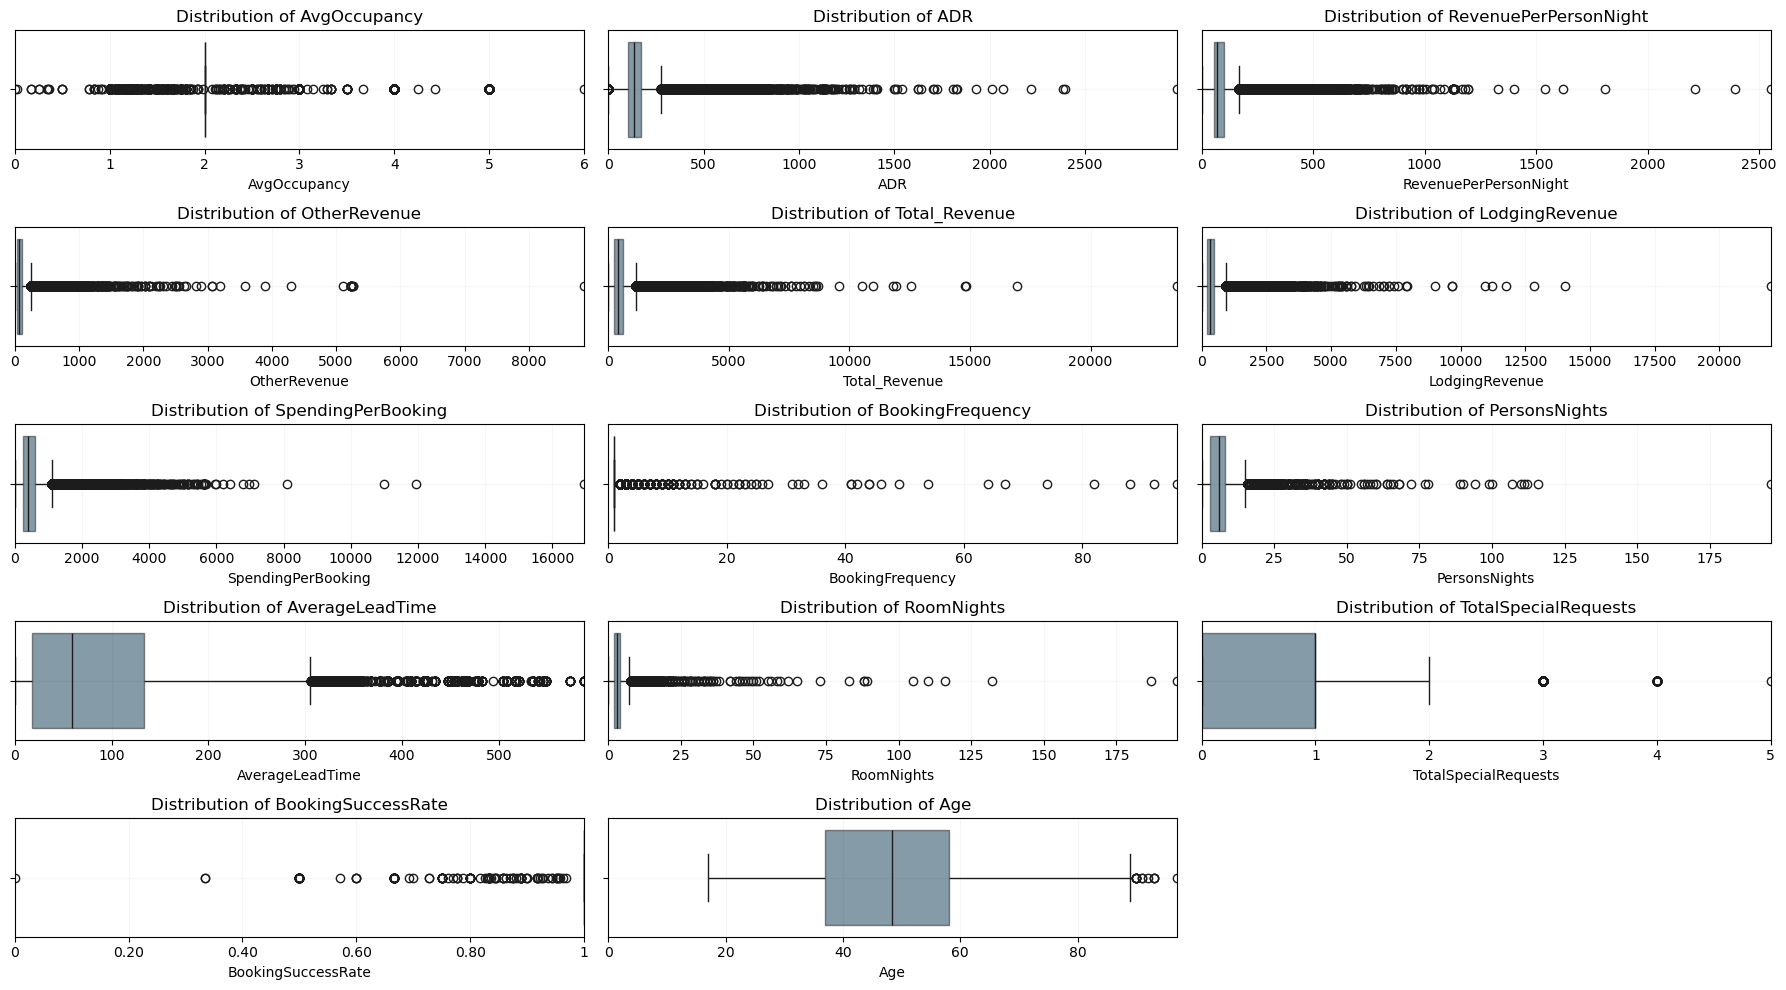

,Variable,Min,Lower Fence,Q1,Median,Q3,Upper Fence,Max
0,AvgOccupancy,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,6.000000
1,ADR,0.000000,1.188744,105.000000,134.000000,174.207504,278.018761,2983.800049
2,RevenuePerPersonNight,0.000000,-12.908327,54.916668,71.000000,100.133331,167.958326,2552.750000
3,OtherRevenue,0.000000,-104.000000,28.000000,60.000000,116.000000,248.000000,8859.250000
4,Total_Revenue,0.000000,-287.175018,248.250000,393.000000,605.200012,1140.625031,23597.000000
5,LodgingRevenue,0.000000,-258.800018,191.679993,315.799988,492.000000,942.480011,21981.000000
6,SpendingPerBooking,0.000000,-275.024986,241.740005,381.299988,586.250000,1103.014992,16936.300781
7,BookingFrequency,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.000000
8,PersonsNights,0.000000,-4.500000,3.000000,6.000000,8.000000,15.500000,196.000000
9,AverageLeadTime,0.000000,-154.500000,18.000000,59.000000,133.000000,305.500000,588.000000


In [459]:
num_cols = 3
num_rows = (len(columns_with_outliers) + num_cols - 1) // num_cols 
stats_df = plot_boxplots(df_outliers, columns_with_outliers, num_rows, num_cols)
pd.set_option('display.max_rows', 80)
stats_df

In [460]:
df_outliers[df_outliers['OtherRevenue'] == df_outliers['OtherRevenue'].max()]

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,BookingFrequency,BookingSuccessRate,TotalSpecialRequests,SRFloor,SRBed,SRNoisePreference,SRBathroom,Total_Revenue,SpendingPerBooking,RevenuePerPersonNight,AvgOccupancy,ADR
46528,PRT,45.0,577,14.0,1649.5,8859.25,0,0,11,29,15,Corporate,Corporate,0,0,0,0,0,0,0,1,0,0,0,0,0,11,1.0,1,0,1,0,0,10508.75,955.340881,362.370697,1.933333,700.583313


In [461]:
df_outliers[df_outliers['LodgingRevenue'] == df_outliers['LodgingRevenue'].max()]

,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,BookingFrequency,BookingSuccessRate,TotalSpecialRequests,SRFloor,SRBed,SRNoisePreference,SRBathroom,Total_Revenue,SpendingPerBooking,RevenuePerPersonNight,AvgOccupancy,ADR
107800,PRT,48.428909,1315,34.0,21981.0,1616.0,1,0,30,64,187,Corporate,Direct,0,0,0,0,0,0,0,0,0,0,0,0,0,31,0.967742,0,0,0,0,0,23597.0,761.193542,368.703125,0.342246,126.187164


> In this particular case, we observe that these high revenue values come from records within the Corporate Distribution Channel. This is likely due to the fact that companies tend to have higher expenses, such as covering meals for more people, booking conference rooms, and other related costs. While these values are plausible, they introduce what we can call the 'Bill Gates effect' in these columns, meaning a small number of extreme values could disproportionately influence the analysis. Therefore, we need to find a way to minimize this impact.
>
> ❌ We decided not to use the IQR method because it would remove too many rows, leading to excessive data loss. Instead, we aim to limit data removal to a maximum of 5%.

- **Z-Score** <a id='z-score'></a> _(Formula and usage here)_

In [464]:
def get_outliers_zscore(numeric_df, threshold=3):
    """
    Identifies outliers using the Z-score method.
    """
    z_scores = np.abs(zscore(numeric_df))
    outlier_counts = (z_scores > threshold).sum()
    total_rows = len(numeric_df)
    outlier_percentages = (outlier_counts / total_rows) * 100
    return outlier_percentages[outlier_percentages > 0].sort_values(ascending=False).apply(lambda x: f"{x:.2f}%")

In [465]:
outlier_counts_zscore = get_outliers_zscore(df_outliers[numeric_variables])

In [466]:
outlier_counts_zscore

AvgOccupancy             2.55%
ADR                      2.21%
SpendingPerBooking       1.84%
RevenuePerPersonNight    1.78%
LodgingRevenue           1.69%
Total_Revenue            1.64%
AverageLeadTime          1.44%
PersonsNights            1.42%
OtherRevenue             1.16%
TotalSpecialRequests     0.95%
RoomNights               0.68%
BookingFrequency         0.32%
BookingSuccessRate       0.20%
Age                      0.01%
dtype: object

> ✅ Seems an aceptable %, will be considered during treatment.

- **DBSCAN** <a id='dbscan'></a> _(Clustering method for detecting outliers)_

In [469]:
def get_outliers_dbscan(numeric_df, eps=0.5, min_samples=2):
    """
    Identifies outliers using DBSCAN clustering.
    """
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(numeric_df)
    outlier_counts = pd.Series(labels).value_counts().get(-1, 0)
    total_rows = len(numeric_df)
    outlier_percentage = (outlier_counts / total_rows) * 100
    return f"{outlier_percentage:.2f}%" if outlier_percentage > 0 else "0.00%"

In [470]:
scaled_data = StandardScaler().fit_transform(df_outliers[numeric_variables])
outlier_counts_dbscan = get_outliers_dbscan(scaled_data)

In [471]:
outlier_counts_dbscan

'25.33%'

> ❌ We decided not to use this method because it would remove too many rows

- **Local Outlier Factor (LOF)** <a id='lof'></a> _(Density-based outlier detection)_

In [474]:
def get_outliers_lof(numeric_df, contamination=0.02):
    """
    Identifies outliers using Local Outlier Factor (LOF).
    """
    model = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    preds = model.fit_predict(numeric_df)
    outlier_counts = (preds == -1).sum()
    total_rows = len(numeric_df)
    outlier_percentage = (outlier_counts / total_rows) * 100
    return f"{outlier_percentage:.2f}%" if outlier_percentage > 0 else "0.00%"

In [475]:
outlier_counts_lof = get_outliers_lof(df_outliers[numeric_variables])

In [476]:
outlier_counts_lof

'2.00%'

> ✅ Will be tested as well.

🔹 **Handling Strategies**
- **Removal** <a id='outlier-removal'></a> _(When and how to remove outliers)_

In [479]:
df_zscore = df_outliers.copy()
df_lof = df_outliers.copy()
df_manual = df_outliers.copy()
df_modified_zscore = df_outliers.copy()

#list of columns numeric_variables

In [480]:
def remove_outliers_zscore(df, numeric_columns, threshold=3):
    df_filtered = df.copy()
    initial_rows = len(df_filtered)

    z_scores = np.abs(zscore(df_filtered[numeric_columns], nan_policy='omit'))
    mask = (z_scores < threshold).all(axis=1)
    df_filtered = df_filtered[mask]

    data_loss = (1 - len(df_filtered) / initial_rows) * 100
    return df_filtered, round(data_loss, 2)

In [481]:
df_zscore, zscore_loss = remove_outliers_zscore(df_zscore, numeric_variables)

In [482]:
print(f"Data Loss - Z-Score: {zscore_loss}%")

Data Loss - Z-Score: 10.39%


In [483]:
def remove_outliers_modified_zscore(df, numeric_columns, threshold=3.5):
    df_filtered = df.copy()
    initial_rows = len(df_filtered)

    median = df_filtered[numeric_columns].median()
    
    # Compute MAD (Manually since `mad()` is removed)
    mad = df_filtered[numeric_columns].apply(lambda x: np.median(np.abs(x - np.median(x))))

    # Compute Modified Z-Score
    modified_z_scores = 0.6745 * (df_filtered[numeric_columns] - median) / mad

    # Identify and filter outliers
    mask = (np.abs(modified_z_scores) < threshold).all(axis=1)
    df_filtered = df_filtered[mask]

    data_loss = (1 - len(df_filtered) / initial_rows) * 100
    return df_filtered, round(data_loss, 2)

In [484]:
df_modified_zscore, mod_zscore_loss = remove_outliers_modified_zscore(df_modified_zscore, numeric_variables)

In [485]:
print(f"Data Loss - Modified Z-Score: {mod_zscore_loss}%")

Data Loss - Modified Z-Score: 100.0%


In [338]:
# 2. Removal with LOF
def remove_outliers_lof(df, numeric_columns, contamination=0.05):
    df_filtered = df.copy()
    initial_rows = len(df_filtered)

    lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    outlier_predictions = lof.fit_predict(df_filtered[numeric_columns])

    mask = outlier_predictions == 1  # Keep only inliers
    df_filtered = df_filtered[mask]

    data_loss = (1 - len(df_filtered) / initial_rows) * 100
    return df_filtered, round(data_loss, 2)

In [340]:
df_lof, lof_loss = remove_outliers_lof(df_lof, numeric_variables)

In [342]:
print(f"Data Loss - LOF: {lof_loss}%")

Data Loss - LOF: 5.0%


In [ ]:
df_modified_zscore.dtypes

In [558]:
# 3. Manual Removal

outlier_criteria = {
    'AverageLeadTime': 365,
    'LodgingRevenue': 2500,
    'OtherRevenue': 1000,
...
    'PersonsNights': 60,
    'RoomNights': 60}

def remove_outliers_manual(df, conditions):
    df_filtered = df.copy()
    initial_rows = len(df_filtered)

    for column, (lower, upper) in conditions.items():
        df_filtered = df_filtered[(df_filtered[column] >= lower) & (df_filtered[column] <= upper)]

    data_loss = (1 - len(df_filtered) / initial_rows) * 100
    return df_filtered, round(data_loss, 2)

SyntaxError: ':' expected after dictionary key (851119079.py, line 7)

In [ ]:
df_manual, manual_loss = remove_outliers_manual(df_manual, {"column_name": (lower_bound, upper_bound)})

In [ ]:
print(f"Data Loss - Manual: {manual_loss}%")

- **Winsorization** <a id='winsorization'></a> _(Adjusting extreme values - no loss)_

In [ ]:
df_winsorized = df_outliers.copy()

In [ ]:
def apply_winsorization(df, numeric_columns, limits=(0.05, 0.05)):
    df_winsorized = df.copy()
    
    for col in numeric_columns:
        df_winsorized[col] = winsorize(df_winsorized[col], limits=limits)
    
    return df_winsorized

In [ ]:
df_winsorized = apply_winsorization(df_winsorized, numeric_variables)

- **Transformation (Log, Box-Cox, etc.)** <a id='transformation'></a> _(Mathematical transformations)_

In [ ]:
df_transformed = df_outliers.copy()

In [560]:
def apply_transformations(df, numeric_columns):
    df_transformed = df.copy()

    for col in numeric_columns:
        if df_transformed[col].min() > 0:
            df_transformed[col + "_log"] = np.log(df_transformed[col])
            df_transformed[col + "_boxcox"], _ = boxcox(df_transformed[col])
        else:
            df_transformed[col + "_log"] = np.log(df_transformed[col] + abs(df_transformed[col].min()) + 1)
            df_transformed[col + "_boxcox"], _ = boxcox(df_transformed[col] + abs(df_transformed[col].min()) + 1)

    return df_transformed

In [ ]:
df_transformed = apply_transformations(df_transformed, numeric_variables)

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import zscore, boxcox
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats.mstats import winsorize

# Copy the DataFrame for different methods


# Function to remove outliers using Z-score


# Function to remove outliers using LOF


# Function for manual removal based on user-defined conditions


# Function to apply Winsorization (adjusts extreme values)


# Function to apply transformations (Log and Box-Cox)


# Function to remove outliers using Modified Z-score


# Apply outlier removal and transformation methods
df_zscore, zscore_loss = remove_outliers_zscore(df_zscore, numeric_variables)

  # Define conditions




# Print Data Loss
print(f"Data Loss - Z-Score: {zscore_loss}%")
print(f"Data Loss - LOF: {lof_loss}%")
print(f"Data Loss - Manual: {manual_loss}%")



---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Encoding**</span> <a id='encoding'></a>
_..._

In [ ]:
ver os paises mais importantes e deixa los isolados 

In [ ]:
unique_nationalities = ds_Encoded['Nationality'].unique().tolist()

In [117]:
country_map = {
    'BRA': 'South_America','CHE': 'Other_Europe','FRA': 'France','DEU': 'Germany', 'CZE': 'Other_Europe',
    'AUT': 'Other_Europe','JPN': 'Asia','BEL': 'Other_Europe','GBR': 'United Kingdom','USA': 'North_America',
    'ESP': 'Other_Europe','PRT': 'Portugal','POL': 'Other_Europe','CHL': 'South_America','HUN': 'Other_Europe',
    'ISR': 'Asia','NLD': 'Other_Europe','MEX': 'North_America','SWE': 'Other_Europe','UKR': 'Other_Europe',
    'ARG': 'South_America','ITA': 'Other_Europe','GEO': 'Other_Europe','IRL': 'Other_Europe','ECU': 'South_America',
    'NOR': 'Other_Europe','PAN': 'North_America','DNK': 'Other_Europe','LUX': 'Other_Europe','RUS': 'Other_Europe',
    'CAN': 'North_America','ZAF': 'Africa','SVN': 'Other_Europe','FIN': 'Other_Europe','IND': 'Asia',
    'UZB': 'Asia','COD': 'Africa','JOR': 'Asia','ROU': 'Other_Europe','MAR': 'Africa','GRC': 'Other_Europe',
    'MUS': 'Africa','TUR': 'Asia','CHN': 'Asia','AUS': 'Oceania','SRB': 'Other_Europe','MLT': 'Other_Europe',
    'SGP': 'Asia','LVA': 'Other_Europe','ISL': 'Other_Europe','EST': 'Other_Europe','VEN': 'South_America',
    'MWI': 'Africa','IRN': 'Asia','BLR': 'Other_Europe','IDN': 'Asia','KOR': 'Asia','DOM': 'North_America',
    'CMR': 'Africa','SYR': 'Asia','SVK': 'Other_Europe','COL': 'South_America','PHL': 'Asia','MLI': 'Africa',
    'MOZ': 'Africa','PER': 'South_America','MYS': 'Asia','HRV': 'Other_Europe','CYP': 'Other_Europe','AGO': 'Africa',
    'URY': 'South_America','BGD': 'Asia','NZL': 'Oceania','BIH': 'Other_Europe','BGR': 'Other_Europe','ARM': 'Other_Europe',
    'THA': 'Asia','DZA': 'Africa','CRI': 'North_America','SAU': 'Asia','ATA': 'Antarctica', 'NGA': 'Africa',
    'AFG': 'Asia','VNM': 'Asia','CAF': 'Africa','LTU': 'Other_Europe','CPV': 'Africa','AZE': 'Other_Europe','KAZ': 'Asia',
    'GAB': 'Africa','SMR': 'Other_Europe','LBN': 'Asia','TWN': 'Asia','EGY': 'Africa','TGO': 'Africa','BOL': 'South_America',
    'GTM': 'North_America','JAM': 'North_America','PAK': 'Asia','TUN': 'Africa','UGA': 'Africa','ARE': 'Asia',
    'QAT': 'Asia','PRI': 'North_America','BRB': 'North_America','GHA': 'Africa','SEN': 'Africa','SLV': 'North_America',
    'IRQ': 'Asia','BEN': 'Africa','GIB': 'Other_Europe','LIE': 'Other_Europe','MDV': 'Asia','OMN': 'Asia',
    'ERI': 'Africa','CUB': 'North_America','SDN': 'Africa','MMR': 'Asia','MCO': 'Other_Europe','LAO': 'Asia',
    'MKD': 'Other_Europe','ALB': 'Other_Europe','ATF': 'Antarctica','ASM': 'Oceania','ATG': 'North_America','KGZ': 'Asia',
    'RWA': 'Africa','NAM': 'Africa','CIV': 'Africa','LCA': 'North_America','PRY': 'South_America','KIR': 'Oceania',
    'WLF': 'Oceania','LBY': 'Africa','KEN': 'Africa','GUY': 'South_America','KWT': 'Asia','JEY': 'Other_Europe',
    'BHR': 'Asia','SUR': 'South_America','CYM': 'North_America','HKG': 'Asia','YEM': 'Asia','COM': 'Africa',
    'BWA': 'Africa','LKA': 'Asia','FRO': 'Other_Europe','MDG': 'Africa','TJK': 'Asia','AIA': 'North_America',
    'SYC': 'Africa','TCD': 'Africa','SPM': 'North_America','SLE': 'Africa','SJM': 'Other_Europe','BMU': 'North_America',
    'SOM': 'Africa','TZA': 'Africa','GRD': 'North_America','TKM': 'Asia','NIC': 'North_America','ABW': 'North_America',
    'MNE': 'Other_Europe','STP': 'Africa','HTI': 'North_America','NCL': 'Oceania','GNB': 'Africa','PCN': 'Oceania',
    'VIR': 'North_America','AND': 'Other_Europe','GUF': 'South_America','WSM': 'Oceania','SWZ': 'Africa',
    'FLK': 'South_America','ETH': 'Africa','ZWE': 'Africa','MRT': 'Africa','DMA': 'North_America','FSM': 'Oceania'
}

In [ ]:
ds_Encoded['Origin'] = ds_Encoded['Nationality'].map(country_continents)

Since you're using **K-Means**, choosing the right scaling method is crucial because K-Means relies on Euclidean distances. Here's a breakdown of the scaling methods and how they impact clustering:

### 🔹 **Scaling Methods & Differences**
1. **Min-Max Scaling (Normalization)**  
   - **Formula**:  
     \[
     X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
     \]
   - **Effect**: Scales values between **0 and 1**.  
   - **Best for**: When all features should have equal weight, especially if they have different units.  
   - **Impact on K-Means**: Preserves original distributions but can be sensitive to outliers.

2. **Standardization (Z-Score Scaling)**  
   - **Formula**:  
     \[
     X' = \frac{X - \mu}{\sigma}
     \]
   - **Effect**: Transforms data to have a mean of **0** and a standard deviation of **1**.  
   - **Best for**: When data has different scales but follows a normal distribution.  
   - **Impact on K-Means**: Helps when features have different magnitudes; recommended for most cases.

3. **Robust Scaling**  
   - **Formula**:  
     \[
     X' = \frac{X - \text{median}(X)}{\text{IQR}(X)}
     \]
   - **Effect**: Similar to Z-score but based on the **median** and **IQR**, making it resistant to outliers.  
   - **Best for**: Datasets with **skewed distributions** and **many outliers**.  
   - **Impact on K-Means**: Reduces the effect of outliers, which can improve clustering performance.

4. **Log Transformation**  
   - **Formula**:  
     \[
     X' = \log(1 + X)
     \]
   - **Effect**: Reduces skewness in distributions.  
   - **Best for**: **Highly skewed** data (e.g., financial data with large variations).  
   - **Impact on K-Means**: Can help separate clusters if the data is exponential.

5. **Power Transform (Box-Cox, Yeo-Johnson)**  
   - **Effect**: Stabilizes variance and makes the distribution more **normal-like**.  
   - **Best for**: When data has **non-normal distributions**.  
   - **Impact on K-Means**: Useful when dealing with skewed features; makes clusters more distinguishable.

---

### 🔹 **Which One to Use for K-Means?**
- **If your data has different units/scales** → **Use Standardization (Z-score)**
- **If your data has many outliers** → **Use Robust Scaling**
- **If your data is highly skewed** → **Use Log or Power Transform**
- **If you need all values between 0-1** → **Use Min-Max Scaling** (useful for deep learning)

🔹 **Recommended for most cases:** **Standardization (Z-score)**  
Would you like help testing the impact of different scaling methods on your K-Means results? 🚀

---

#### <span style="background-color:#accbf1; padding:5px; border-radius:5px;">**Normalization & Scaling**</span> <a id='scaling'></a>

>🔹 **Methods**
- **Min-Max Scaling (Normalization)** <a id='min-max-scaling'></a> _(Scaling values between 0 and 1)_
- **Standardization (Z-Score)** <a id='standardization'></a> _(Mean-centered scaling)_
- **Robust Scaling** <a id='robust-scaling'></a> _(Scaling based on IQR)_
- **Log Transformation** <a id='log-transformation'></a> _(Useful for skewed data)_
- **Power Transform (Box-Cox, Yeo-Johnson)** <a id='power-transform'></a> _(Variance stabilization)_


In [469]:
def scale_data(numeric_df, method="standardization"):
    """
    Scales the data using different methods.
    Available methods: 'min-max', 'standardization', 'robust', 'log', 'power'.
    """
    scaler = None
    if method == "min-max":
        scaler = MinMaxScaler()
    elif method == "standardization":
        scaler = StandardScaler()
    elif method == "robust":
        scaler = RobustScaler()
    elif method == "log":
        return np.log1p(numeric_df)
    elif method == "power":
        scaler = PowerTransformer(method="yeo-johnson")
    else:
        raise ValueError("Invalid scaling method. Choose from 'min-max', 'standardization', 'robust', 'log', 'power'.")
    
    return pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns) if scaler else numeric_df

In [ ]:




### **📌 Variable Pre-selection** <a id='variable-preselection'></a>
_(Feature selection techniques here)_
univariancia - pouca variaçai dentro de uma mesma coluna 
---

### **📌 Dimensionality Reduction** <a id='dimensionality-reduction'></a>
_(Why and when to reduce dimensionality)_

#### 🔹 **Methods**
- **PCA** <a id='pca'></a> _(Principal Component Analysis explanation)_
- **t-SNE** <a id='tsne'></a> _(t-Distributed Stochastic Neighbor Embedding)_
- **UMAP** <a id='umap'></a> _(Uniform Manifold Approximation and Projection)_

---

### **📌 Final Pipeline** <a id='final-pipeline'></a>
_(Bringing all preprocessing steps together)_

---

#### Dimensionality reduction 

Techniques to reduce the number of features:

- PCA
- t-SNE
- UMAP

### 📌 Modeling <a id='modeling'></a>

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

---

### 📌 Evaluation <a id='evaluation'></a>

##### Click [here](#table-of-contents) ⬆️ to return to the Index.

---

### 📌 Conclusion <a id='conclusion'></a>

##### Click [here](#table-of-contents) ⬆️ to return to the Index.
---